## Lifecycle of Machine Learning Project

* Understanding the problem
* Data Collection
* Data Cleaning
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Model Evaluation

# 1) Problem Statement

* Implementing Linear Regression on Algerian Forest Life Dataset

# 2) Data Collection

* The dataset is downloaded from UCI website.


* The dataset includes 244 instances that regroup a data of two regions of Algeria.


* The Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.


* 122 instances for each region.


* The period from June 2012 to September 2012.


* The dataset includes 11 attribues and 1 output attribue (class).


* The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.


* This dataset comprises weather data attributes.


* Can be used to predict the forest fire weather type.


* Prediction can help to monitor on fire and make proper prevention.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline

In [3]:
#Loading the dataset
data = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data.head(10)

day month  year Temperature  RH  Ws Rain   FFMC   DMC    DC  ISI   BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7   3.4   7.6  1.3   3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4   4.1   7.6    1   3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6   1.3   6.9    0   1.7    0   
4   5     6  2012          27  77  16     0  64.8     3  14.2  1.2   3.9  0.5   
5   6     6  2012          31  67  14     0  82.6   5.8  22.2  3.1     7  2.5   
6   7     6  2012          33  54  13     0  88.2   9.9  30.5  6.4  10.9  7.2   
7   8     6  2012          30  73  15     0  86.6  12.1  38.3  5.6  13.5  7.1   
8   9     6  2012          25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9  10     6  2012          28  79  12     0  73.2   9.5  46.3  1.3  12.6  0.9   

       Classes  
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
5      fire     
6      fire     
7      fire     
8  not fire     
9  not fire

# 3) Data Cleaning

## 3.1) Removing unwanted rows from the dataset

In [4]:
data.drop(index=[122,123],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

## 3.2) Adding new column name 'Region' in dataset

In [5]:
for i in range(len(data)):
    if i <= 121:
        data['Region'] = 'Bejaia'
    else:
        data['Region'][i] = 'Sidi Bel-abbes'

In [6]:
data

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
240  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
241  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
242  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
243  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
244  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes          Region  
0    0.5   not fire             Bejaia  
1    0.4   not fire             Bejaia  
2    0.1   not fire             Bejaia  
3      0   not fire             Bejaia  
4    0.5   not fire             Bejaia  
..   ...           ...             ...  
240  6.5       fire     Sidi Bel-abbes  
241    0   not fire     Sidi Bel-abbes  
242  0.2   not fire     Sidi Bel-abbes  
243  0.7   not fire     Sidi Bel-abbes  
244  0.5  not fire      Sidi Bel-abbes  

[245 rows x 15 columns]

## 3.3) Renaming the names of the columns

In [7]:
data.rename(columns={' RH': 'RH', ' Ws': 'Ws', 'Rain ': 'Rain', 'Classes  ':'Classes'},inplace=True)

In [8]:
data.head(10)

day month  year Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7   3.4   7.6  1.3   3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4   4.1   7.6    1   3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6   1.3   6.9    0   1.7    0   
4   5     6  2012          27  77  16     0  64.8     3  14.2  1.2   3.9  0.5   
5   6     6  2012          31  67  14     0  82.6   5.8  22.2  3.1     7  2.5   
6   7     6  2012          33  54  13     0  88.2   9.9  30.5  6.4  10.9  7.2   
7   8     6  2012          30  73  15     0  86.6  12.1  38.3  5.6  13.5  7.1   
8   9     6  2012          25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9  10     6  2012          28  79  12     0  73.2   9.5  46.3  1.3  12.6  0.9   

       Classes  Region  
0  not fire     Bejaia  
1  not fire     Bejaia  
2  not fire     Bejaia  
3  not fire     Bejaia  
4  not fire     Bejaia  
5      fire     Bejaia  
6      fire     Bejaia  
7      fire     Bejaia  
8  not fire     Bejaia  
9  not fire     Bejaia

## 3.4) Stripping the classes features

In [9]:
data.Classes = data.Classes.str.strip()
data['Classes'].unique()

array(['not fire', 'fire', 'Classes', nan], dtype=object)

* The code above removes the white spaces from the Classes column in a pandas dataframe. 


* The **str.strip()** method is applied to the Classes column, which returns a new series with the white spaces removed from each string in the column.


* **data.Classes** selects the Classes column from the data dataframe.


* **.str** accesses the string methods for each element in the series.


* **.strip()** removes white spaces from the left and right end of each string in the series.


* The result is a new series without white spaces, which is then assigned back to the Classes column in the data dataframe.

In [10]:
data.head(10)

day month  year Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7   3.4   7.6  1.3   3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4   4.1   7.6    1   3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6   1.3   6.9    0   1.7    0   
4   5     6  2012          27  77  16     0  64.8     3  14.2  1.2   3.9  0.5   
5   6     6  2012          31  67  14     0  82.6   5.8  22.2  3.1     7  2.5   
6   7     6  2012          33  54  13     0  88.2   9.9  30.5  6.4  10.9  7.2   
7   8     6  2012          30  73  15     0  86.6  12.1  38.3  5.6  13.5  7.1   
8   9     6  2012          25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9  10     6  2012          28  79  12     0  73.2   9.5  46.3  1.3  12.6  0.9   

    Classes  Region  
0  not fire  Bejaia  
1  not fire  Bejaia  
2  not fire  Bejaia  
3  not fire  Bejaia  
4  not fire  Bejaia  
5      fire  Bejaia  
6      fire  Bejaia  
7      fire  Bejaia  
8  not fire  Bejaia  
9  not fire  Bejaia

# 4) Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of systematically analyzing and summarizing the main characteristics of a data set, often with visual methods. 


* In machine learning, EDA is an important step to understand the underlying patterns and relationships within the data, identify any outliers, missing values, or discrepancies, and to prepare the data for modeling.


* EDA can also help in feature selection, variable transformation, and creating new features that can improve the performance of the machine learning models. 


* The goal of EDA is to gain insights and understanding of the data, so that informed decisions can be made about how to proceed with the modeling process.

* The available methods for exploratory data analysis are:
1. Univariate Analysis: Analyzing individual features to understand their distribution, central tendency, and spread.


2. Bivariate Analysis: Analyzing the relationship between two features to understand their correlation and patterns.


3. Multivariate Analysis: Analyzing the relationship between multiple features to understand the underlying patterns and structures.


4. Data Cleaning: Dealing with missing or incorrect values, and transforming or scaling the data.


5. Data Visualization: Using plots and graphs to understand the patterns and relationships in the data.


6. Dimensionality Reduction: Reducing the number of features in the data set, while retaining the most important information.


7. Outlier Detection: Identifying and dealing with outlier values that can impact the modeling process.


* These methods help to identify potential problems in the data and ensure that the data is in a format suitable for modeling.

## 4.1) Data Profiling

* Data profiling in machine learning refers to the process of examining and analyzing the characteristics of a dataset. 


* It aims to understand the quality, structure, and distribution of the data and identify any issues such as missing values, outliers, inconsistent values, etc. 


* The objective of data profiling is to gain insights into the data, identify any problems and prepare the data for modeling and analysis. 


* Some common techniques for data profiling include data exploration, descriptive statistics, correlation analysis, and data visualization.

In [11]:
#Checking the shape of the dataset
data.shape

(245, 15)

In [12]:
#Checking the columns of the dataset
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
#Checking for missing values
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [14]:
#Fixing particular row from the dataset which is having the NULL value
data.iloc[166]

day                        14
month                       7
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                     14.6 9
ISI                      12.5
BUI                      10.4
FWI                   fire   
Classes                   NaN
Region         Sidi Bel-abbes
Name: 166, dtype: object

In [15]:
#Resetting the mismatched position
data.at[166,'DC'] = 14.6
data.at[166,'ISI'] = 9
data.at[166,'BUI'] = 12.5
data.at[166,'FWI'] = 10.4
data.at[166,'Classes'] = 'fire'

* This code modifies the values of the DC, ISI, BUI, FWI, and Classes columns for a specific row in the data dataframe.


* **data.at[165,'DC']** selects the value of the DC column for the row at index 165 in the data dataframe.


* **data.at[165,'DC'] = 14.6** sets the value of the DC column for the row at index 165 to 14.6.


* The **at** method is used here to access a specific value in a dataframe by its index and column label, and it is a fast way to access or modify a single value in a dataframe.

In [16]:
#Again checking the info of that particular row
data.iloc[166]

day                        14
month                       7
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                       14.6
ISI                         9
BUI                      12.5
FWI                      10.4
Classes                  fire
Region         Sidi Bel-abbes
Name: 166, dtype: object

In [17]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
#Changing the data type of all the columns
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data.dropna(inplace=True)
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data['Temperature'] = data['Temperature'].astype(int)
data['RH'] = data['RH'].astype(int)
data['Rain'] = data['Rain'].astype(float)
data['FFMC'] = data['FFMC'].astype(float)
data['DMC'] = data['DMC'].astype(float)
data['DC'] = data['DC'].astype(float)
data['FWI'] = data['FWI'].astype(float)
data['BUI'] = data['BUI'].astype(float)
data['ISI'] = data['ISI'].astype(float)
data['Ws'] = data['Ws'].astype(float)
data['Region'] = data['Region'].astype(object)

* To convert a string column to an integer in a Pandas DataFrame, you can use the pandas astype() method or to_numeric() method with the errors argument set to **coerce**. 


* The **coerce** option will convert any invalid value to **NaN**, which you can then drop using the **dropna()** method.

In [19]:
data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [20]:
#Adding a new feature name Date by replacing unecessary feature like day, month, year
data['Date'] = pd.to_datetime(data[['day','month','year']])
data

day  month  year  Temperature  RH    Ws  Rain  FFMC   DMC    DC  ISI  \
0      1      6  2012           29  57  18.0   0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29  61  13.0   1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26  82  22.0  13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25  89  13.0   2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27  77  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ..   ...   ...   ...   ...   ...  ...   
240   26      9  2012           30  65  14.0   0.0  85.4  16.0  44.5  4.5   
241   27      9  2012           28  87  15.0   4.4  41.1   6.5   8.0  0.1   
242   28      9  2012           27  87  29.0   0.5  45.9   3.5   7.9  0.4   
243   29      9  2012           24  54  18.0   0.1  79.7   4.3  15.2  1.7   
244   30      9  2012           24  64  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI   Classes          Region       Date  
0     3.4  0.5  not fire          Bejaia 2012-06-01  
1     3.9  0.4  not fire          Bejaia 2012-06-02  
2     2.7  0.1  not fire          Bejaia 2012-06-03  
3     1.7  0.0  not fire          Bejaia 2012-06-04  
4     3.9  0.5  not fire          Bejaia 2012-06-05  
..    ...  ...       ...             ...        ...  
240  16.9  6.5      fire  Sidi Bel-abbes 2012-09-26  
241   6.2  0.0  not fire  Sidi Bel-abbes 2012-09-27  
242   3.4  0.2  not fire  Sidi Bel-abbes 2012-09-28  
243   5.1  0.7  not fire  Sidi Bel-abbes 2012-09-29  
244   4.8  0.5  not fire  Sidi Bel-abbes 2012-09-30  

[244 rows x 16 columns]

In [21]:
data.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
data

Temperature  RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI   Classes  \
0             29  57  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5  not fire   
1             29  61  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4  not fire   
2             26  82  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1  not fire   
3             25  89  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0  not fire   
4             27  77  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5  not fire   
..           ...  ..   ...   ...   ...   ...   ...  ...   ...  ...       ...   
240           30  65  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5      fire   
241           28  87  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0  not fire   
242           27  87  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2  not fire   
243           24  54  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7  not fire   
244           24  64  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5  not fire   

             Region       Date  
0            Bejaia 2012-06-01  
1            Bejaia 2012-06-02  
2            Bejaia 2012-06-03  
3            Bejaia 2012-06-04  
4            Bejaia 2012-06-05  
..              ...        ...  
240  Sidi Bel-abbes 2012-09-26  
241  Sidi Bel-abbes 2012-09-27  
242  Sidi Bel-abbes 2012-09-28  
243  Sidi Bel-abbes 2012-09-29  
244  Sidi Bel-abbes 2012-09-30  

[244 rows x 13 columns]

In [23]:
#Checking for unique values
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 244
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(2), object(2)
memory usage: 24.8+ KB


In [25]:
#Checking the memory usage for the dataset
data.memory_usage()

Index          1952
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
Date           1952
dtype: int64

In [26]:
#Defining the numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Date']

In [27]:
#Printing the numerical features
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))

We have 11 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Date']


In [28]:
#Defining categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Date']

In [29]:
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 11 categorical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Date']


## 4.2) Feature information

### a) Weather data components

* Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42

* RH : Relative humidity in %: 21 to 90

* Ws : Wind speed in km/h: 6 to 29

* Rain : total day in mm: 0 to 16.8

### b) Date components

* day, month and year is merged into date.

* date displayed in (DD/MM/YYYY) format.

### c) FWI Components

* FFMC : Fine Fuel Moisture Code index the FWI system: 28.6 to 92.5

* DMC : Duff Moisture Code index from FWI system: 1.1 to 65.9

* ISI : Initial Spread Index from FWI system: 0 to 18.5

* BUI : Buildup Index from FWI index: 1.1 to 68

* DC : Drought Code index from FWI system: 7 to 220.4

* FWI : Fire Weather Index: 0 to 31.1

* Classes : Fire and not Fire

* Region : 1 for Bejaia region and 0 for Sidi Bel-abbes region

## 4.3) Univariate analysis

* Univariate analysis is a statistical method used to analyze and describe a single variable or feature in a dataset. 


* It involves the summarization of the main features of the data such as the mean, median, mode, range, and distribution. 


* Univariate analysis helps to get a better understanding of each individual variable and provides insights into its distribution, skewness, and presence of outliers. 


* It is a basic and important step in exploratory data analysis (EDA) and is often performed prior to multivariate analysis, which involves the examination of multiple variables and their relationships. 

* Univariate analysis involves the analysis of a single variable (univariate) at a time. Some common methods for performing univariate analysis include:

1. Descriptive statistics: Calculating basic statistics such as mean, median, mode, and standard deviation to summarize the distribution of the data.


2. Frequency distribution: Grouping the data into intervals and counting the number of data points in each interval to create a histogram.


3. Box plot: Visualizing the distribution of the data by plotting the median, quartiles, and outliers.


4. Density plot: Estimating the probability density function of the data to visualize the distribution.


5. Probability plot: Comparing the data to a theoretical distribution to identify any deviation from normality. **(scipy.stats.probplot)**


6. Scatter plot: Plotting the relationship between two variables to identify any patterns or trends in the data.


* These methods provide insight into the distribution, skewness, outliers, and other characteristics of the data. This information can be used to make decisions about data pre-processing, feature selection, and model selection.

In [30]:
#Calulcating the variance of the data
data.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
dtype: float64

### 4.3.1) Numerical Feature Analysis

* **KDE(Kernel Density Estimation)** plots are used in statistics to estimate the probability density function of a random variable. 


* They are used to visualize the distribution of a univariate (one variable) set of observations. 


* The idea behind a KDE plot is to smooth out the bumps and peaks in the distribution of the data, making it easier to see the underlying pattern and detect any outliers. 


* The resulting plot shows the estimated density of the data at each point, with the highest density areas represented by the tallest peaks.

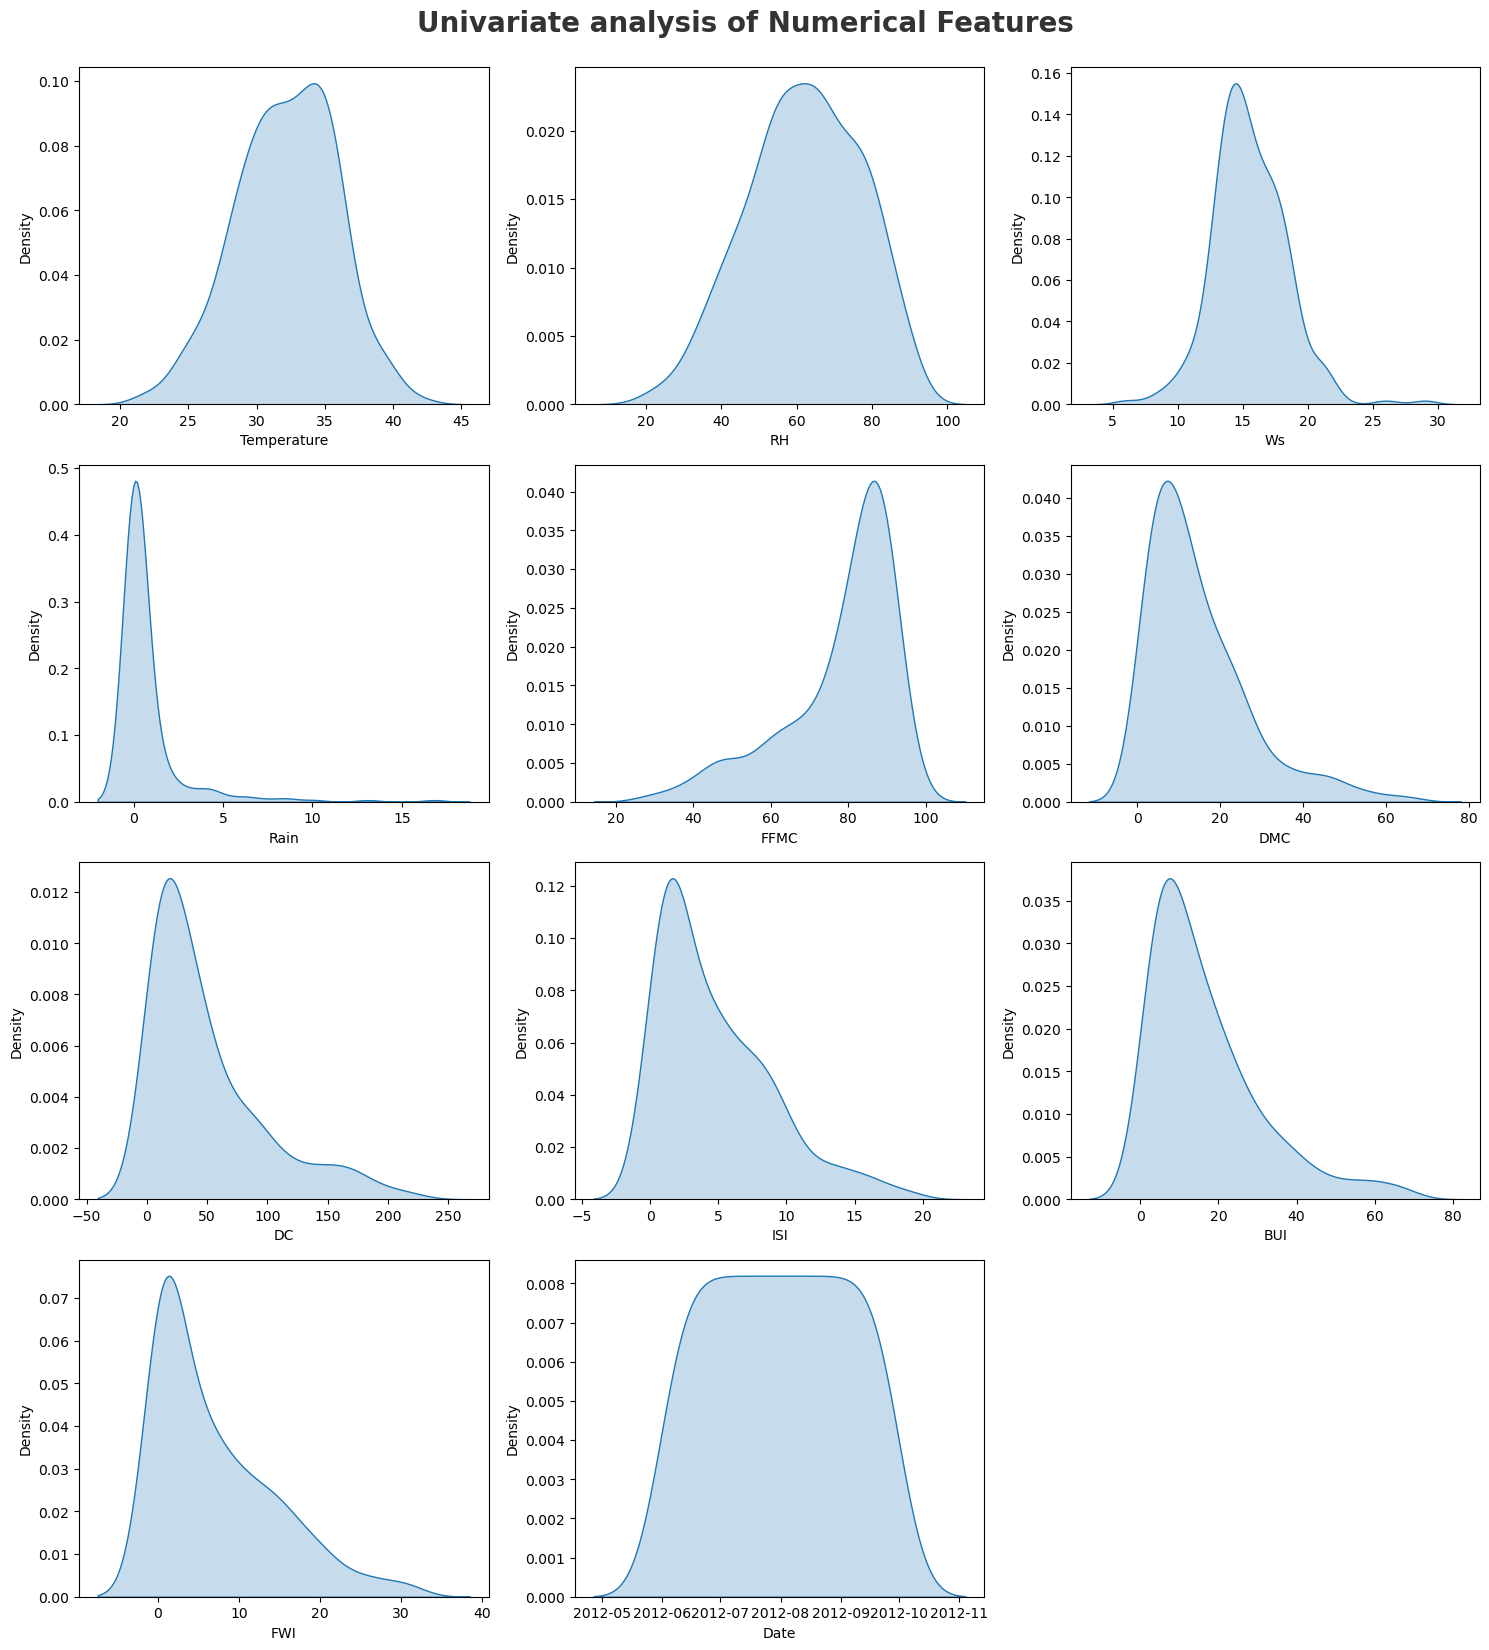

In [31]:
#Plotting the kde plot
plt.figure(figsize=(15,20))
plt.suptitle('Univariate analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True,warn_singular=False)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

* The **suptitle** function is used to add a super title to a plot or subplots in a figure. 


* It adds the title at the top of the figure and can be used to give a high-level description of the entire plot.

* **tight_layout** is a method that adjusts the subplot parameters in a plot to make the plot fit within the plot area. 


* The method calculates the parameters based on the plot area and the subplot parameters, and then updates the subplot parameters to make the plot fit within the plot area. 


* It is usually called after creating the plot and before saving it to ensure that the plot fits within the plot area and all the elements of the plot are visible.

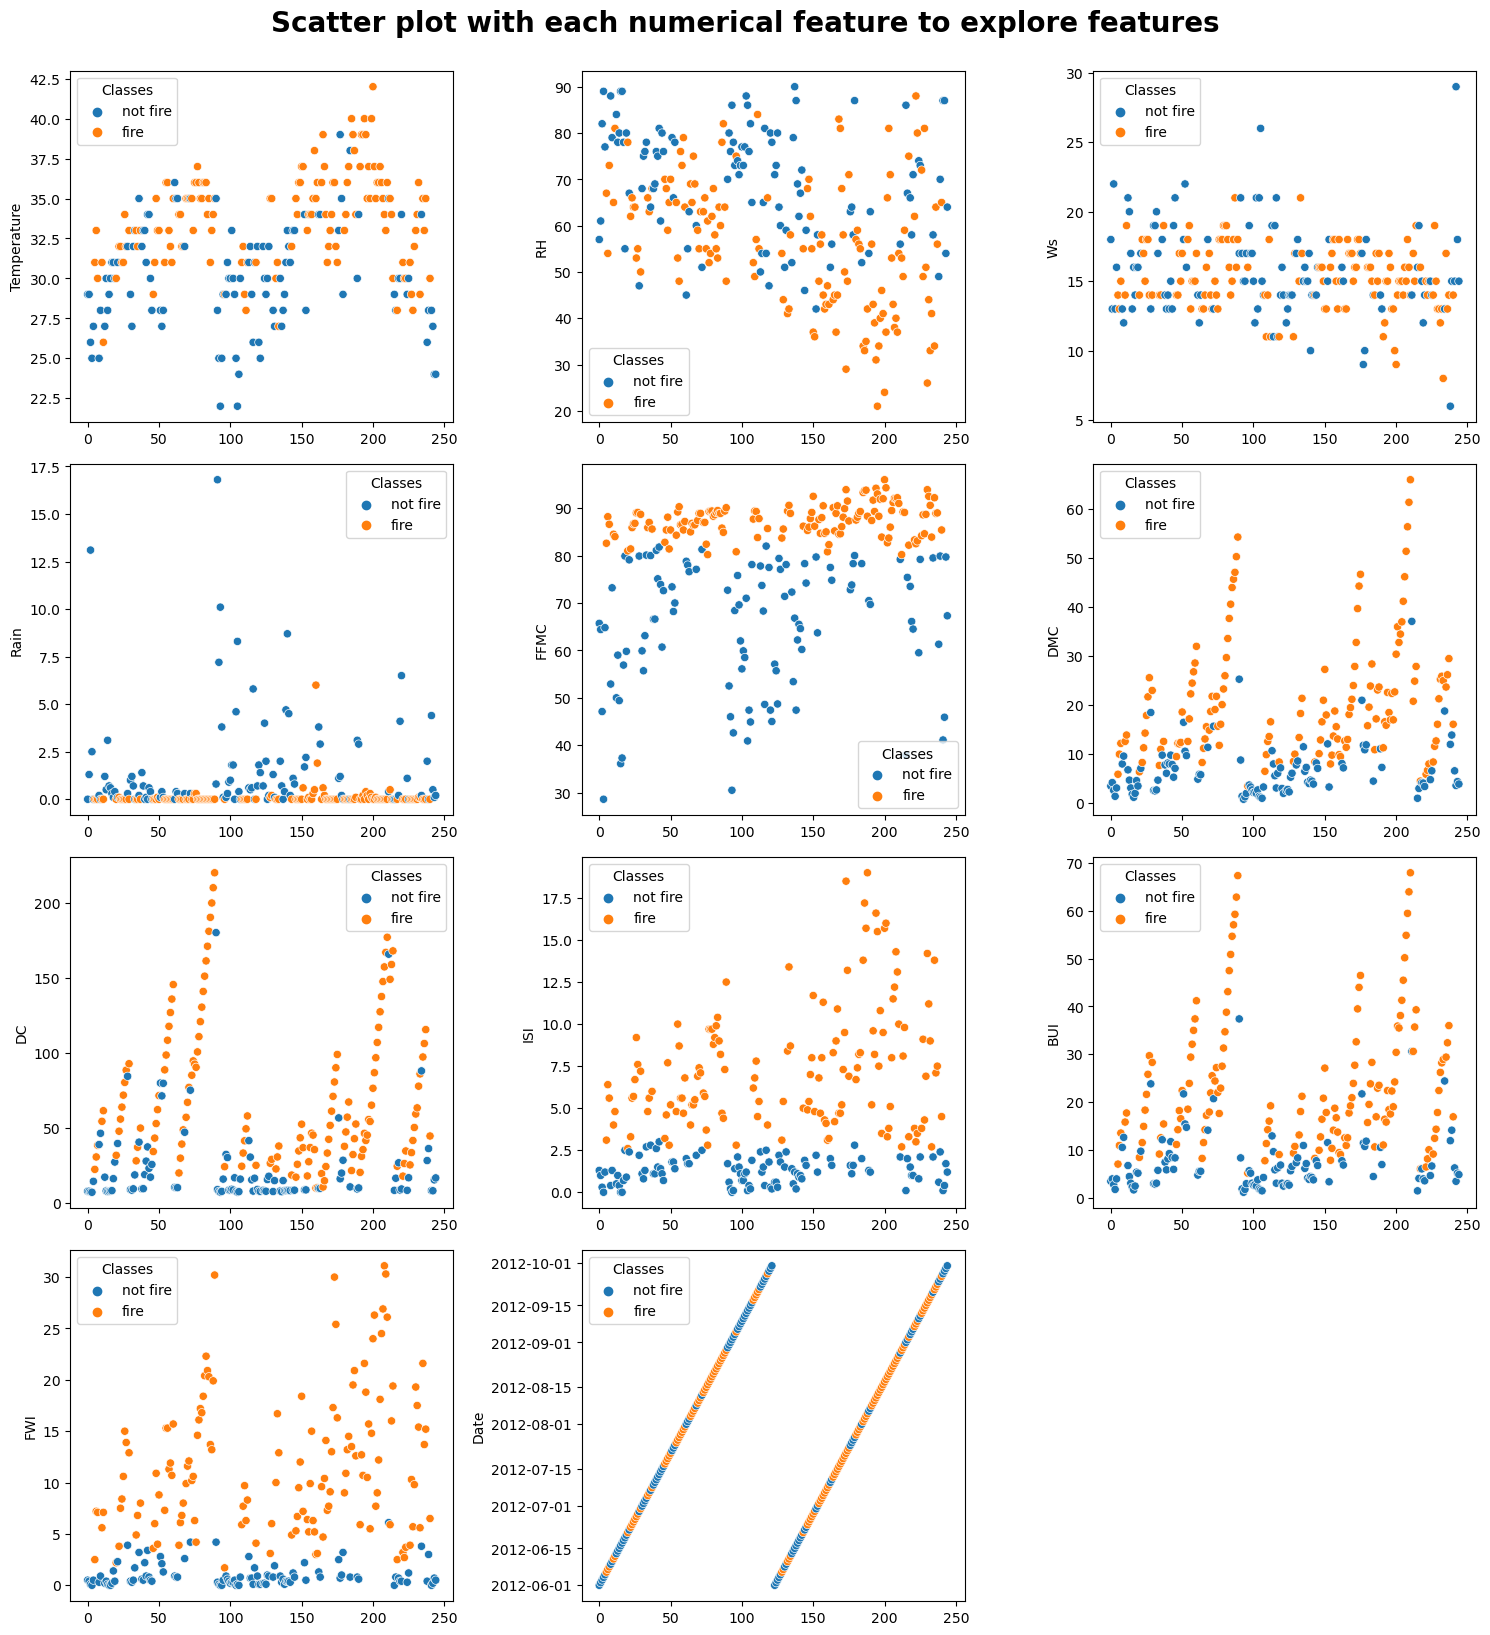

In [33]:
#Scatter plot
plt.figure(figsize=(15,20))
plt.suptitle('Scatter plot with each numerical feature to explore features',fontsize=20,fontweight='bold',alpha=1,y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=numerical_features[i],x=data.index,data=data,hue='Classes')
    plt.tight_layout()

### 4.3.2) Categorical features

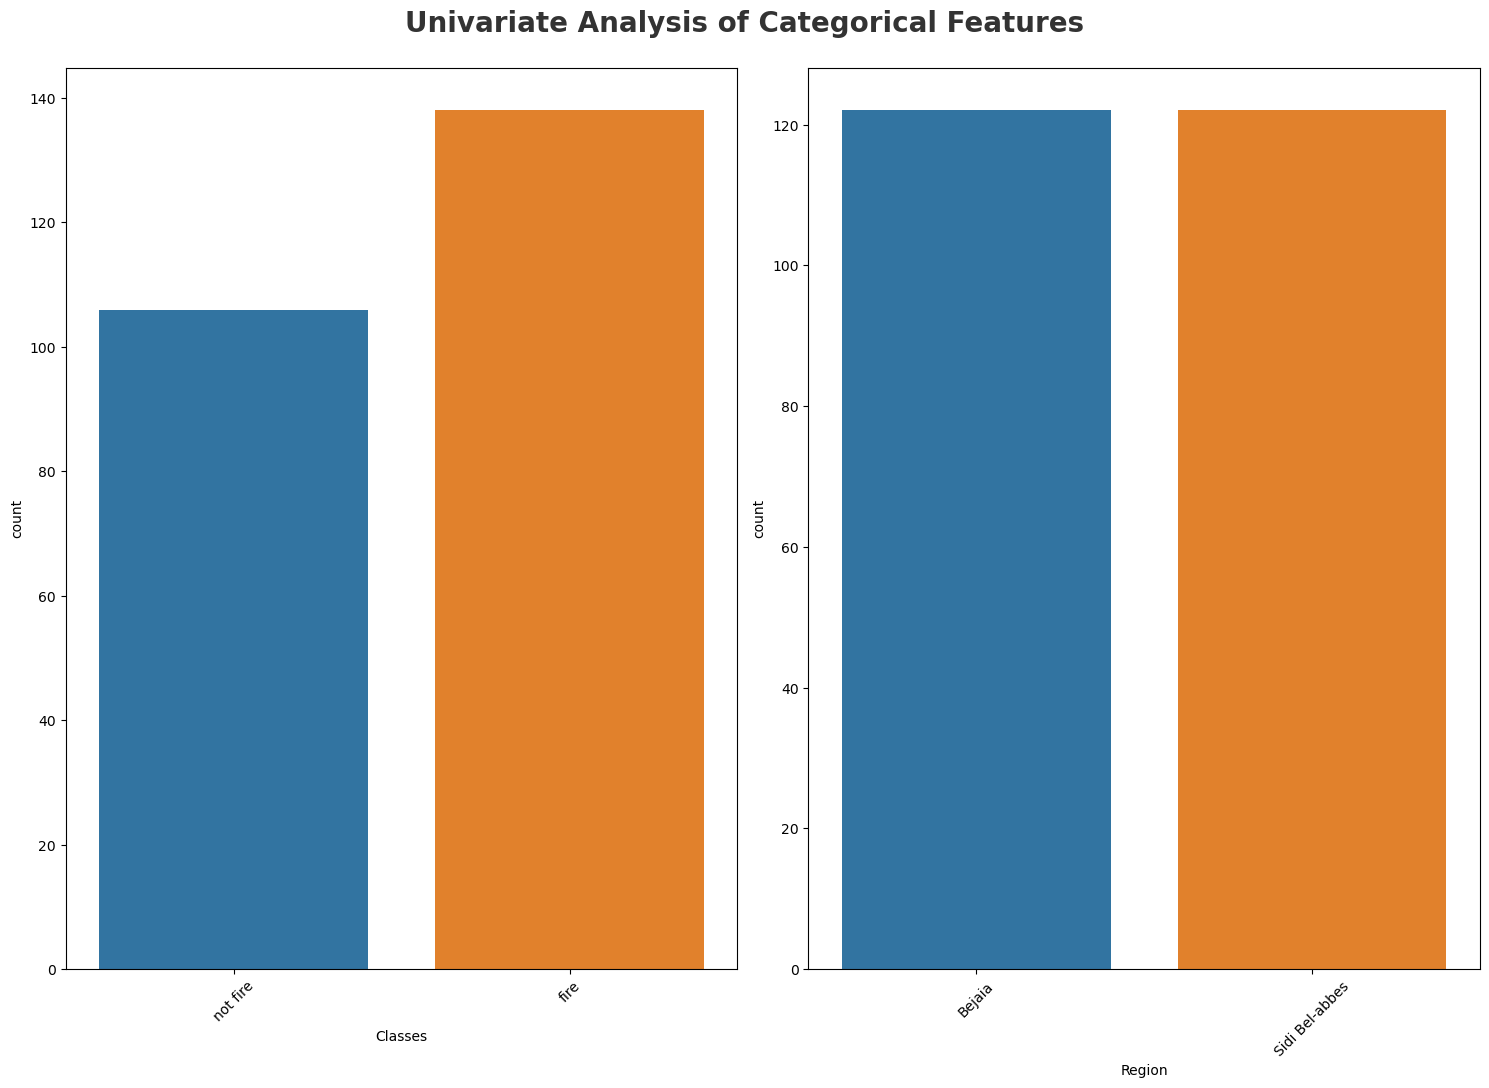

In [34]:
#Count plot
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
cat1 = ['Classes','Region']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [35]:
#Statistical Analysis
data.describe().T

count       mean        std   min     25%    50%     75%    max
Temperature  244.0  32.172131   3.633843  22.0  30.000  32.00  35.000   42.0
RH           244.0  61.938525  14.884200  21.0  52.000  63.00  73.250   90.0
Ws           244.0  15.504098   2.810178   6.0  14.000  15.00  17.000   29.0
Rain         244.0   0.760656   1.999406   0.0   0.000   0.00   0.500   16.8
FFMC         244.0  77.887705  14.337571  28.6  72.075  83.50  88.300   96.0
DMC          244.0  14.673361  12.368039   0.7   5.800  11.30  20.750   65.9
DC           244.0  49.288115  47.619662   6.9  13.275  33.10  68.150  220.4
ISI          244.0   4.759836   4.154628   0.0   1.400   3.50   7.300   19.0
BUI          244.0  16.673361  14.201648   1.1   6.000  12.45  22.525   68.0
FWI          244.0   7.049180   7.428366   0.0   0.700   4.45  11.375   31.1

* Since DMC and BUI are highly coorelated, so dropping anyone won't harm the dataset.

In [36]:
data_new = data.drop(columns=('DMC'),axis=1)
data_new

Temperature  RH    Ws  Rain  FFMC    DC  ISI   BUI  FWI   Classes  \
0             29  57  18.0   0.0  65.7   7.6  1.3   3.4  0.5  not fire   
1             29  61  13.0   1.3  64.4   7.6  1.0   3.9  0.4  not fire   
2             26  82  22.0  13.1  47.1   7.1  0.3   2.7  0.1  not fire   
3             25  89  13.0   2.5  28.6   6.9  0.0   1.7  0.0  not fire   
4             27  77  16.0   0.0  64.8  14.2  1.2   3.9  0.5  not fire   
..           ...  ..   ...   ...   ...   ...  ...   ...  ...       ...   
240           30  65  14.0   0.0  85.4  44.5  4.5  16.9  6.5      fire   
241           28  87  15.0   4.4  41.1   8.0  0.1   6.2  0.0  not fire   
242           27  87  29.0   0.5  45.9   7.9  0.4   3.4  0.2  not fire   
243           24  54  18.0   0.1  79.7  15.2  1.7   5.1  0.7  not fire   
244           24  64  15.0   0.2  67.3  16.5  1.2   4.8  0.5  not fire   

             Region       Date  
0            Bejaia 2012-06-01  
1            Bejaia 2012-06-02  
2            Bejaia 2012-06-03  
3            Bejaia 2012-06-04  
4            Bejaia 2012-06-05  
..              ...        ...  
240  Sidi Bel-abbes 2012-09-26  
241  Sidi Bel-abbes 2012-09-27  
242  Sidi Bel-abbes 2012-09-28  
243  Sidi Bel-abbes 2012-09-29  
244  Sidi Bel-abbes 2012-09-30  

[244 rows x 12 columns]

* Target feature is temperature so, analyzing each feature with respect to temperature.

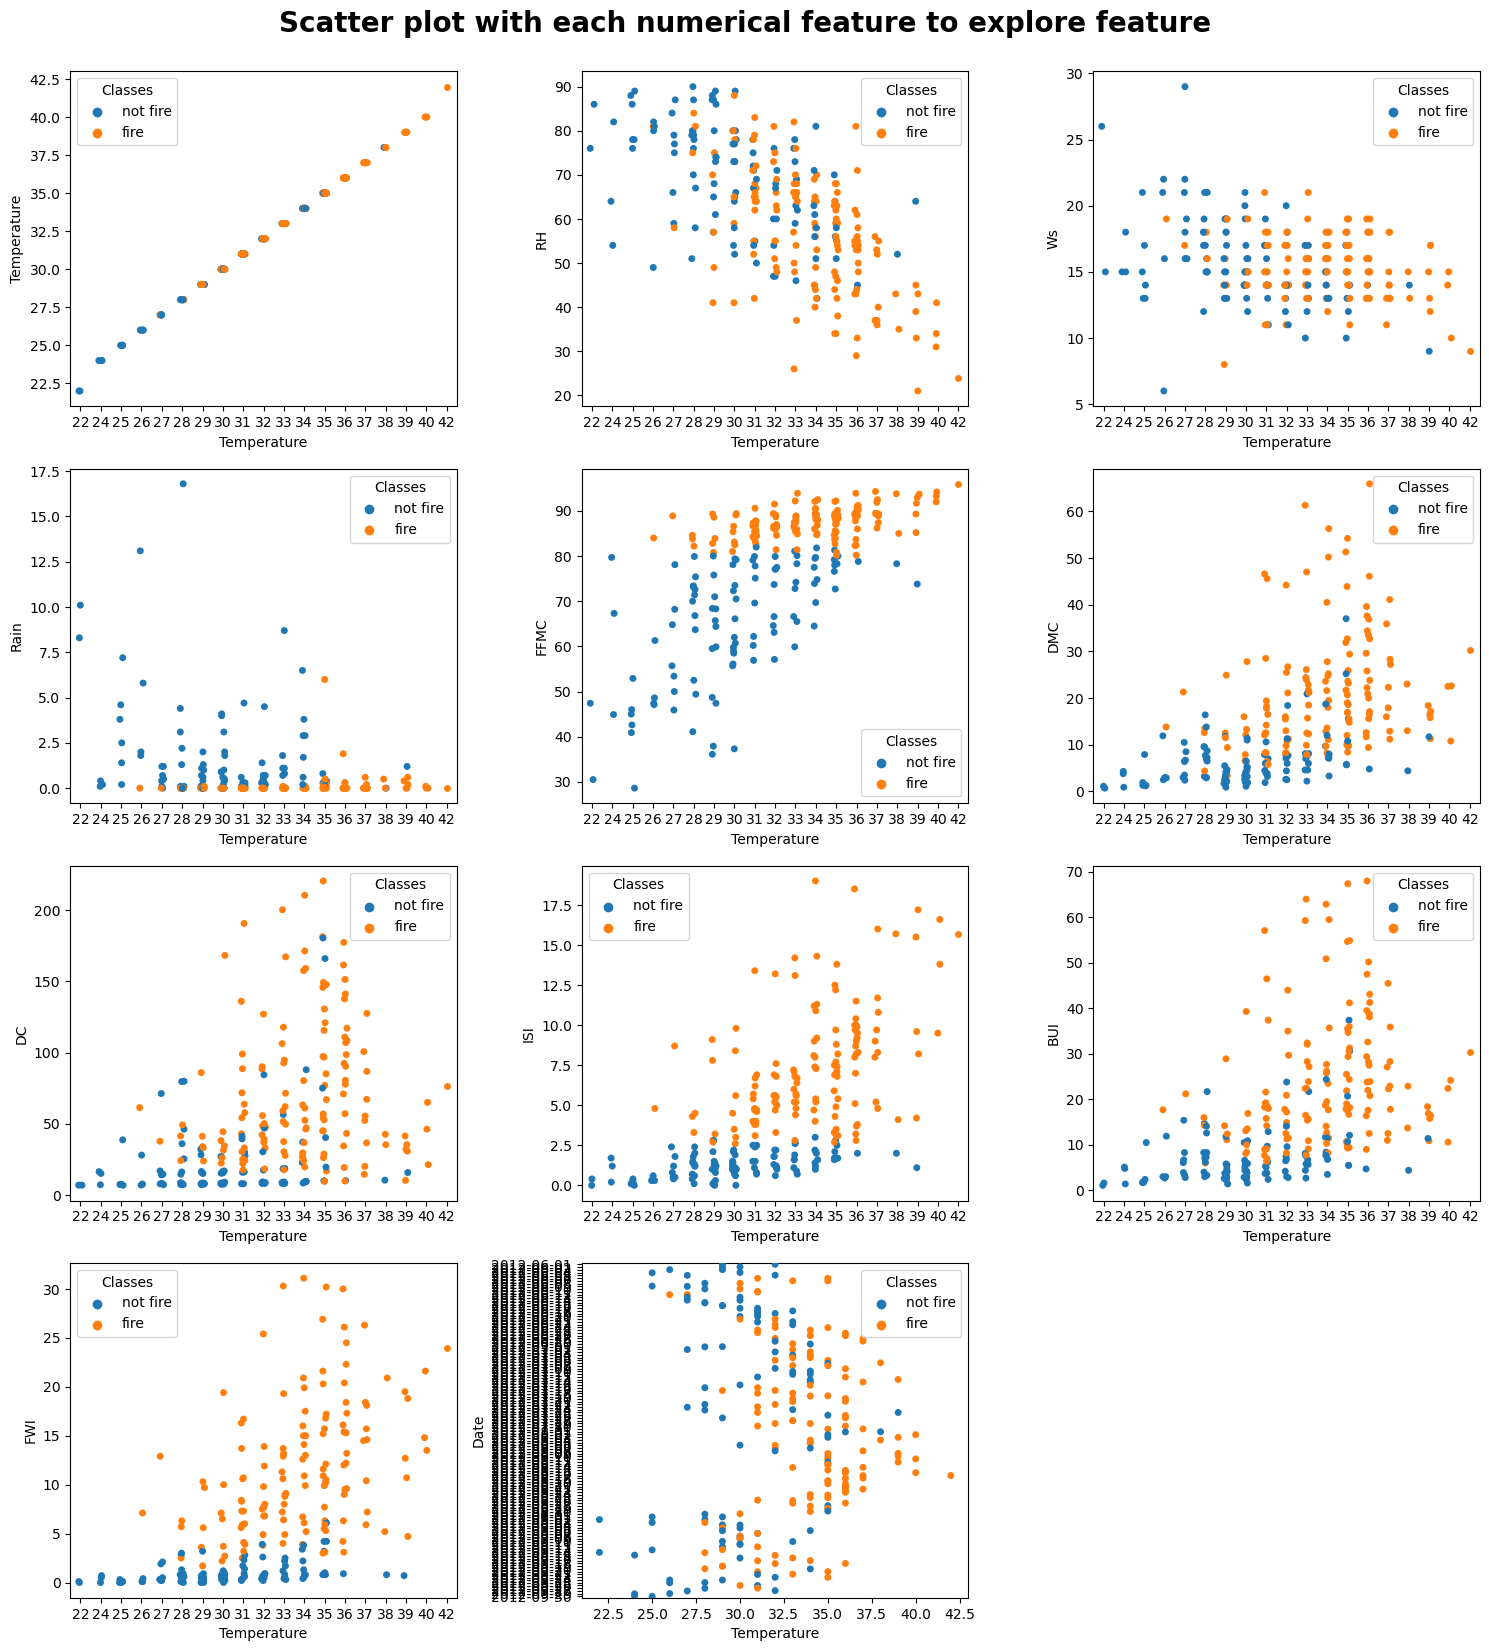

In [37]:
plt.figure(figsize=(15,20))
plt.suptitle('Scatter plot with each numerical feature to explore feature',fontsize=20,fontweight='bold',alpha=1,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=numerical_features[i],x='Temperature',data=data, hue='Classes')
    plt.tight_layout()

* **seaborn.stripplot** is a function which is used to draw a scatterplot where one variable is categorical. 


* Each point represents an observation and is positioned on the categorical axis so that it corresponds with the appropriate category. 


* The points are vertically jittered to avoid overlapping and allow for easier visualization of the distribution of the values for each category. 


* The **stripplot** function is particularly useful for comparing the distribution of values between multiple categories or groups. 


* The **hue parameter** is used to differentiate the points based on a categorical variable. 


* It helps to distinguish different subgroups in the data by plotting each subgroup with a unique color or symbol, making it easier to see patterns in the data based on the different categories. 


* For example, if you have a variable that indicates the type of fruit (apple, banana, or orange), you can use the hue parameter to color-code the points for each type of fruit.

<AxesSubplot: >

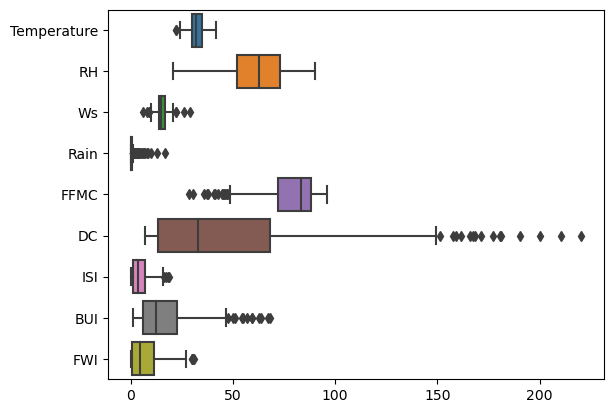

In [38]:
#Box plot is used for finding outliers
sns.boxplot(data=data_new,orient='h')

### Graphical Analysis

### Temperature with respect to Region

<AxesSubplot: xlabel='Region', ylabel='Temperature'>

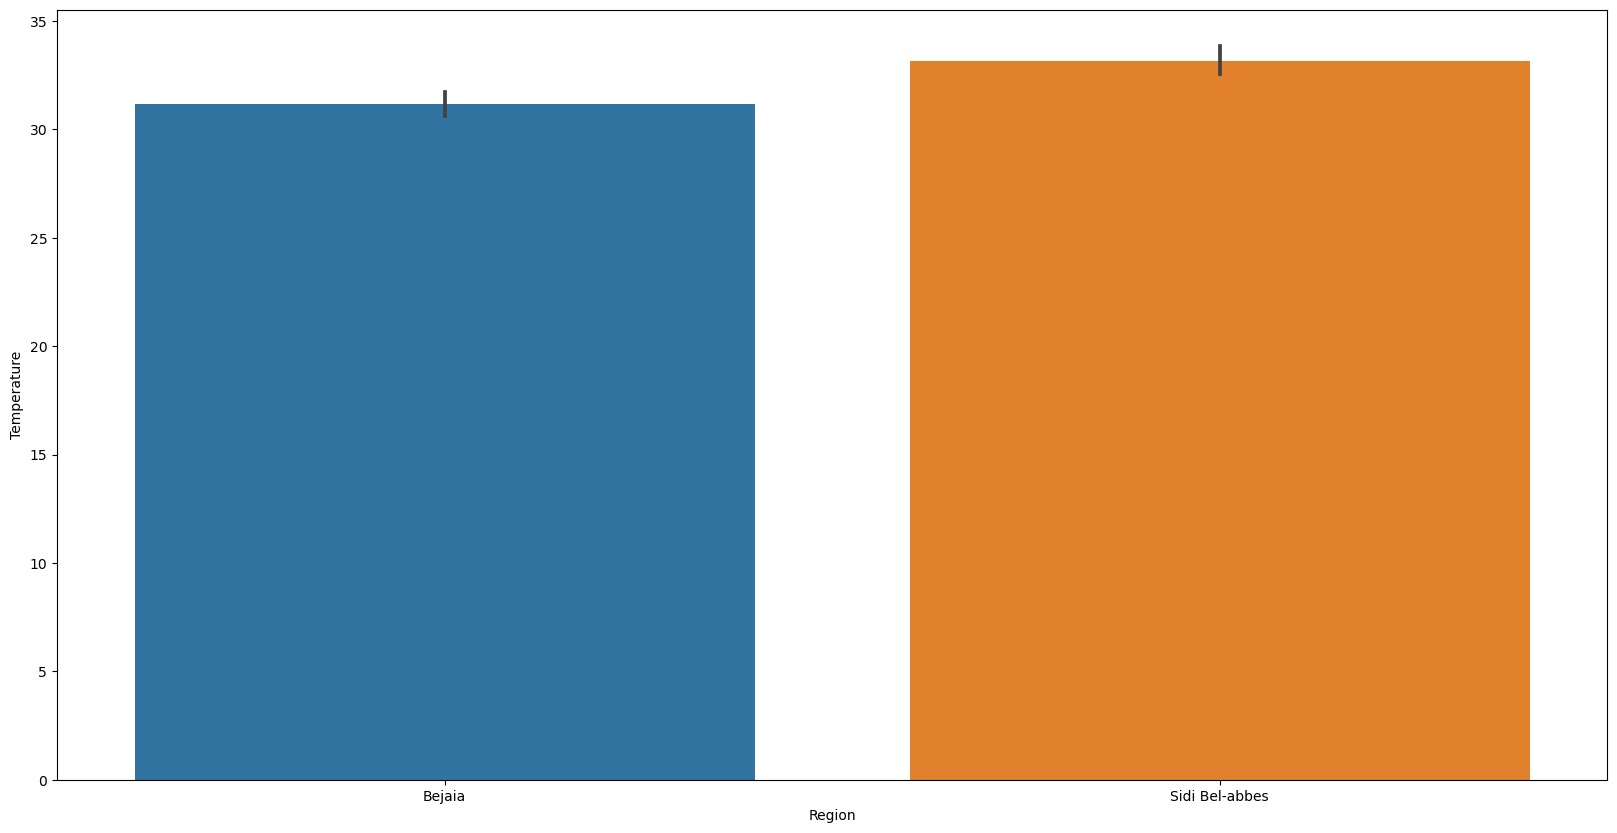

In [39]:
matplotlib.rcParams['figure.figsize'] = (20,10)
sns.barplot(x='Region',y='Temperature',data=data)

### Temperature with respect to Temperature range

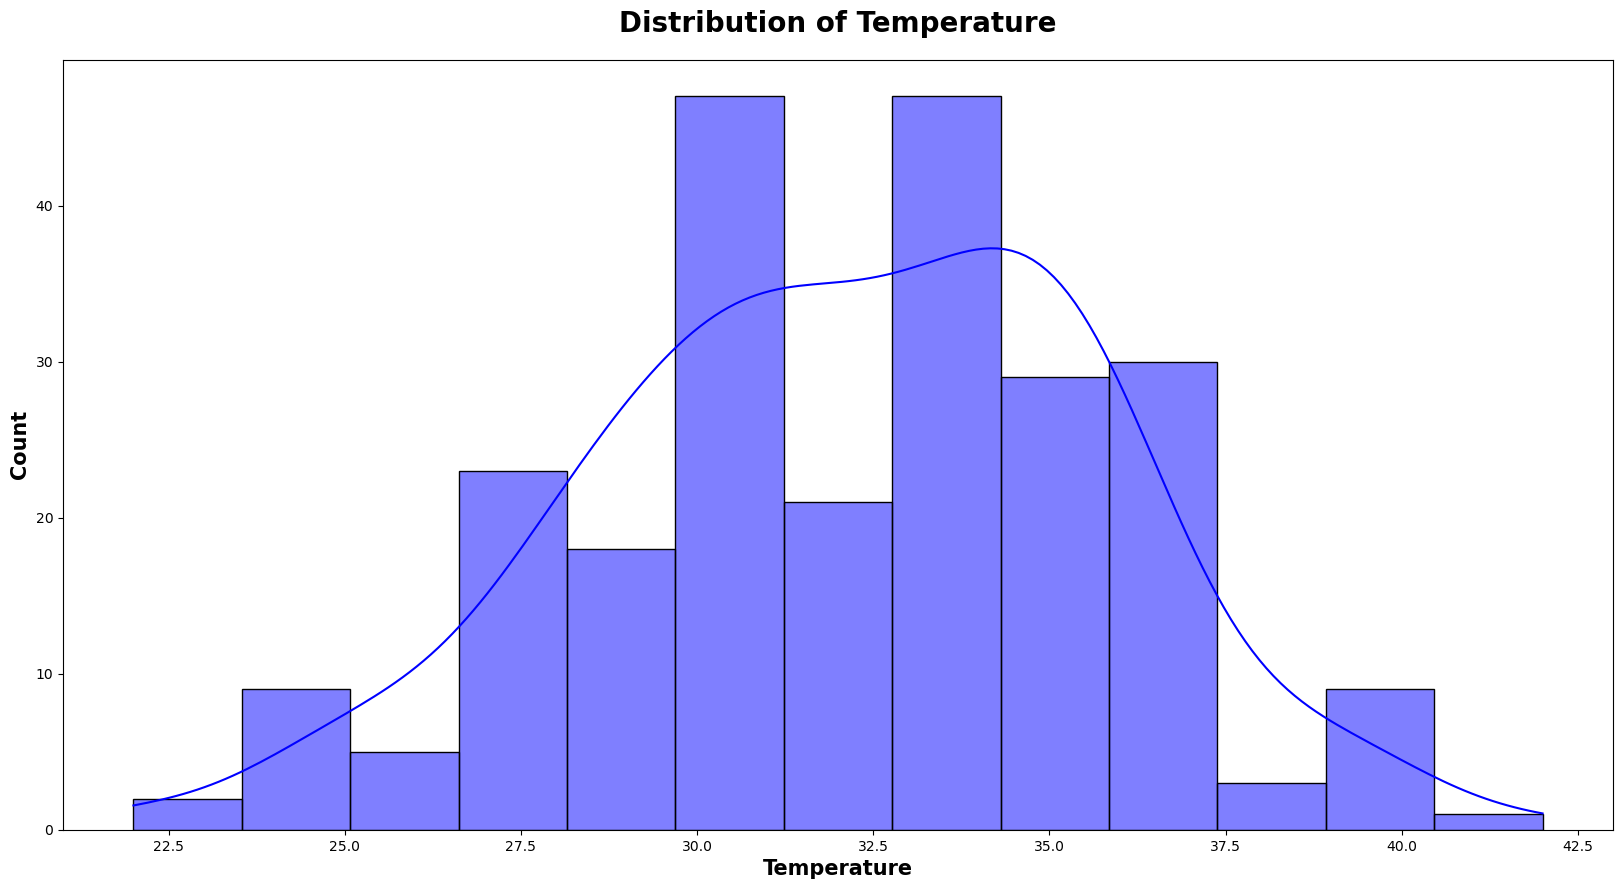

In [44]:
plt.subplots(figsize=(20,10))
sns.histplot('Distribution of Temperature',x=data.Temperature,color='b',kde=True)
plt.title('Distribution of Temperature',weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel('Count',weight='bold',fontsize=15)
plt.show()

### Temperature with respect to Rain

<AxesSubplot: xlabel='Temperature', ylabel='Rain'>

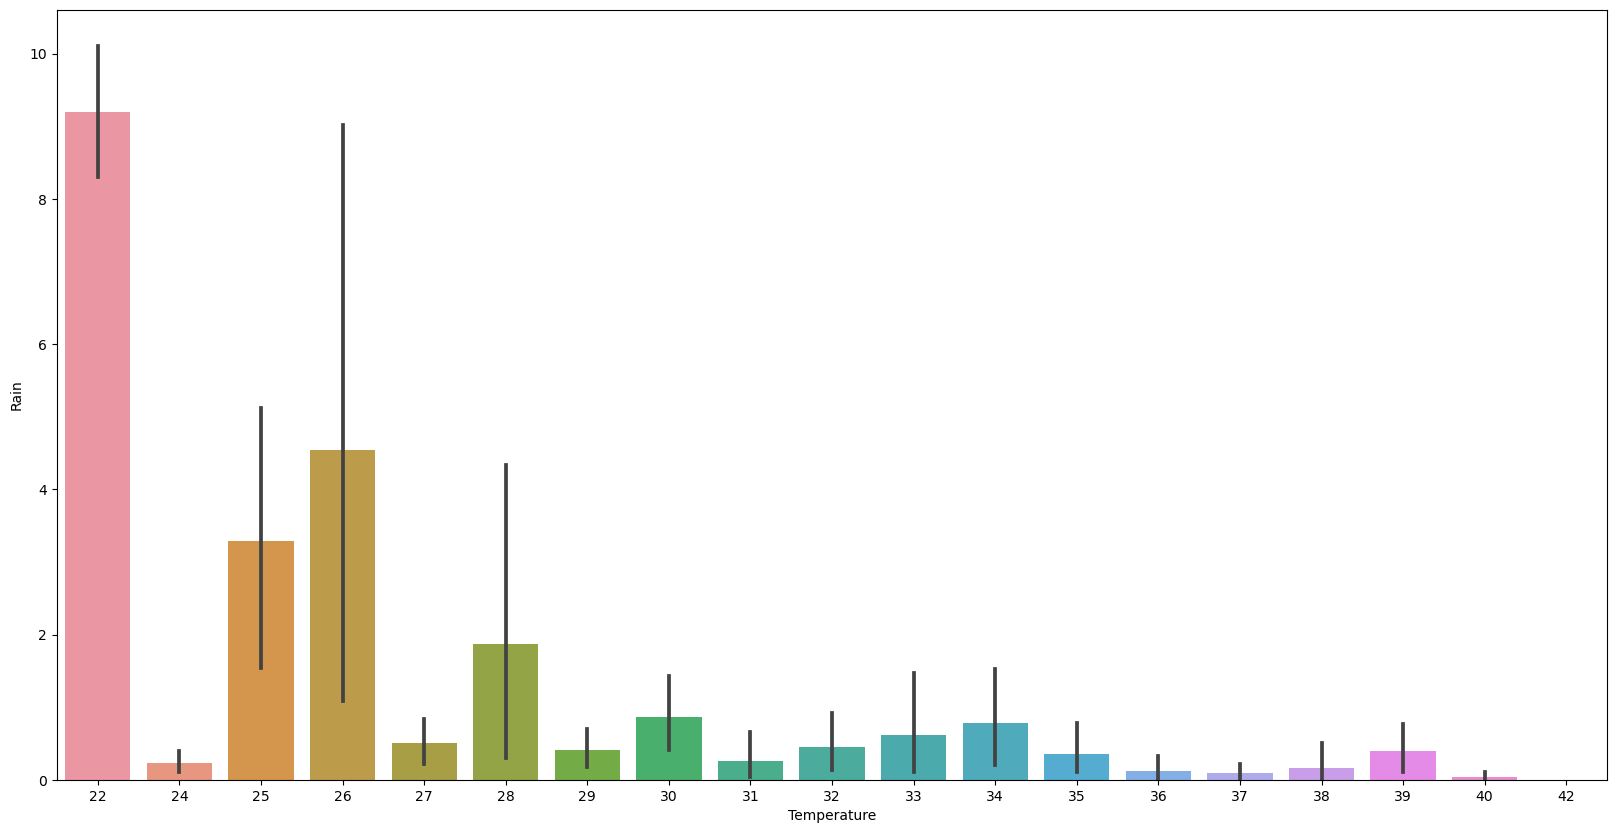

In [45]:
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Temperature',y='Rain',data=data)

## 4.4) Multivariate analysis

In [47]:
#Checking for multicollinearity in numerical features
data.cov()

Temperature          RH         Ws       Rain        FFMC  \
Temperature    13.204817  -35.396782  -2.840215  -2.374270   35.297598   
RH            -35.396782  221.539415   9.874739   6.635431 -137.785533   
Ws             -2.840215    9.874739   7.897102   0.956129   -6.577727   
Rain           -2.374270    6.635431   0.956129   3.997623  -15.595918   
FFMC           35.297598 -137.785533  -6.577727 -15.595918  205.565939   
DMC            21.712423  -74.580245  -0.043306  -7.135415  106.820535   
DC             64.111931 -156.165754  10.203135 -28.258988  344.044709   
ISI             9.148506  -42.561327   0.142964  -2.889611   44.124525   
BUI            23.553987  -73.916459   1.209369  -8.501670  120.185186   
FWI            15.300965  -64.178446   0.708851  -4.823366   73.640607   

                    DMC           DC        ISI         BUI         FWI  
Temperature   21.712423    64.111931   9.148506   23.553987   15.300965  
RH           -74.580245  -156.165754 -42.561327  -73.916459  -64.178446  
Ws            -0.043306    10.203135   0.142964    1.209369    0.708851  
Rain          -7.135415   -28.258988  -2.889611   -8.501670   -4.823366  
FFMC         106.820535   344.044709  44.124525  120.185186   73.640607  
DMC          152.968382   515.552604  34.856991  172.521016   80.407612  
DC           515.552604  2267.632245  99.696270  636.831657  260.718118  
ISI           34.856991    99.696270  17.260932   37.841354   28.467868  
BUI          172.521016   636.831657  37.841354  201.686818   90.399916  
FWI           80.407612   260.718118  28.467868   90.399916   55.180617

* **data.cov()** is a method that calculates the covariance matrix between columns of a data frame data. 


* Covariance is a measure of the relationship between two variables and is calculated as the average of the product of deviations of each variable from their mean. 


* The resulting covariance matrix is a symmetric matrix with variances along the diagonal and covariances off the diagonal. 


* The values in the covariance matrix give an indication of how much the two variables change together. 


* The **cov()** method is used in exploratory data analysis and in statistical modeling to understand the relationships between variables in a dataset.

In [48]:
data.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
RH             -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
Ws             -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370498 -0.220330  0.076245 -0.296804  0.503910  0.875358   
ISI             0.605971 -0.688268  0.012245 -0.347862  0.740751  0.678355   
BUI             0.456415 -0.349685  0.030303 -0.299409  0.590251  0.982206   
FWI             0.566839 -0.580457  0.033957 -0.324755  0.691430  0.875191   

                   DC       ISI       BUI       FWI  
Temperature  0.370498  0.605971  0.456415  0.566839  
RH          -0.220330 -0.688268 -0.349685 -0.580457  
Ws           0.076245  0.012245  0.030303  0.033957  
Rain        -0.296804 -0.347862 -0.299409 -0.324755  
FFMC         0.503910  0.740751  0.590251  0.691430  
DMC          0.875358  0.678355  0.982206  0.875191  
DC           1.000000  0.503919  0.941672  0.737041  
ISI          0.503919  1.000000  0.641351  0.922422  
BUI          0.941672  0.641351  1.000000  0.856912  
FWI          0.737041  0.922422  0.856912  1.000000

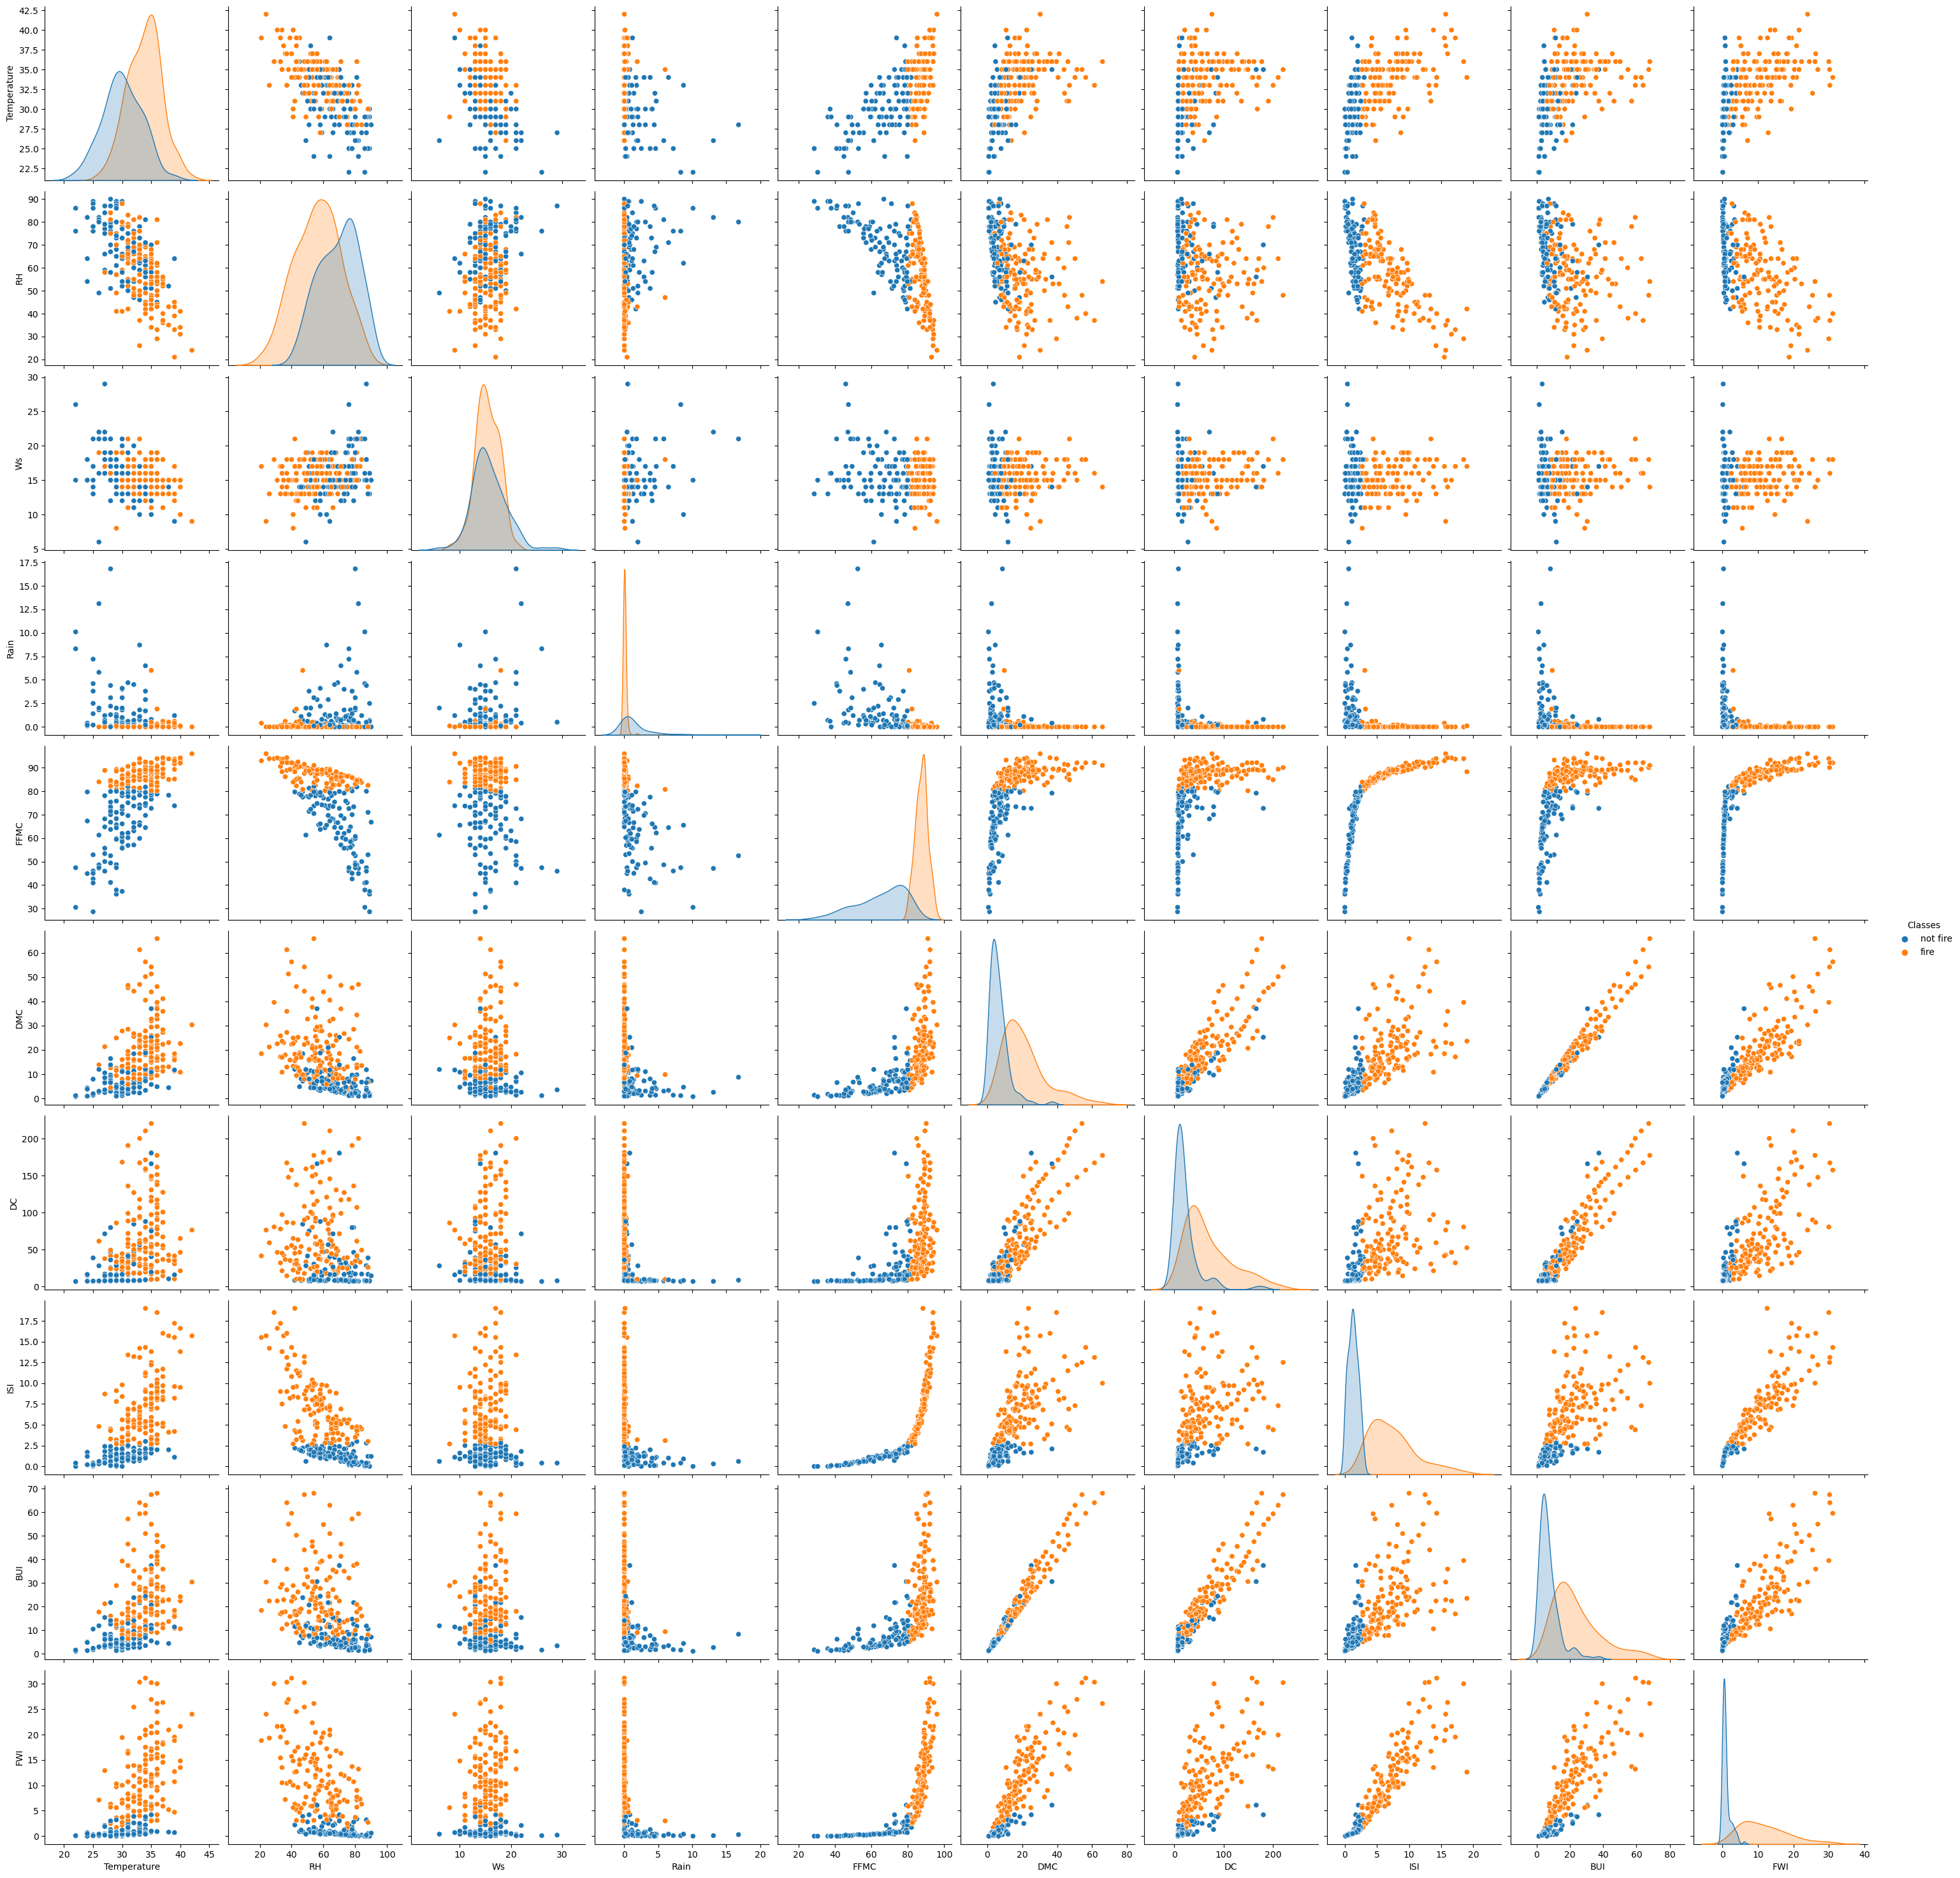

In [49]:
#Pairplot
sns.pairplot(data,hue='Classes',size=3)

* **seaborn.pairplot()** is a function in the seaborn library in Python for creating a pairwise plot of variables in a dataset.


* It creates a matrix of plots between each variable, showing the distribution of each variable and the relationship between them. 


* It is a useful tool for **exploratory data analysis**, especially for understanding the relationships between multiple variables.

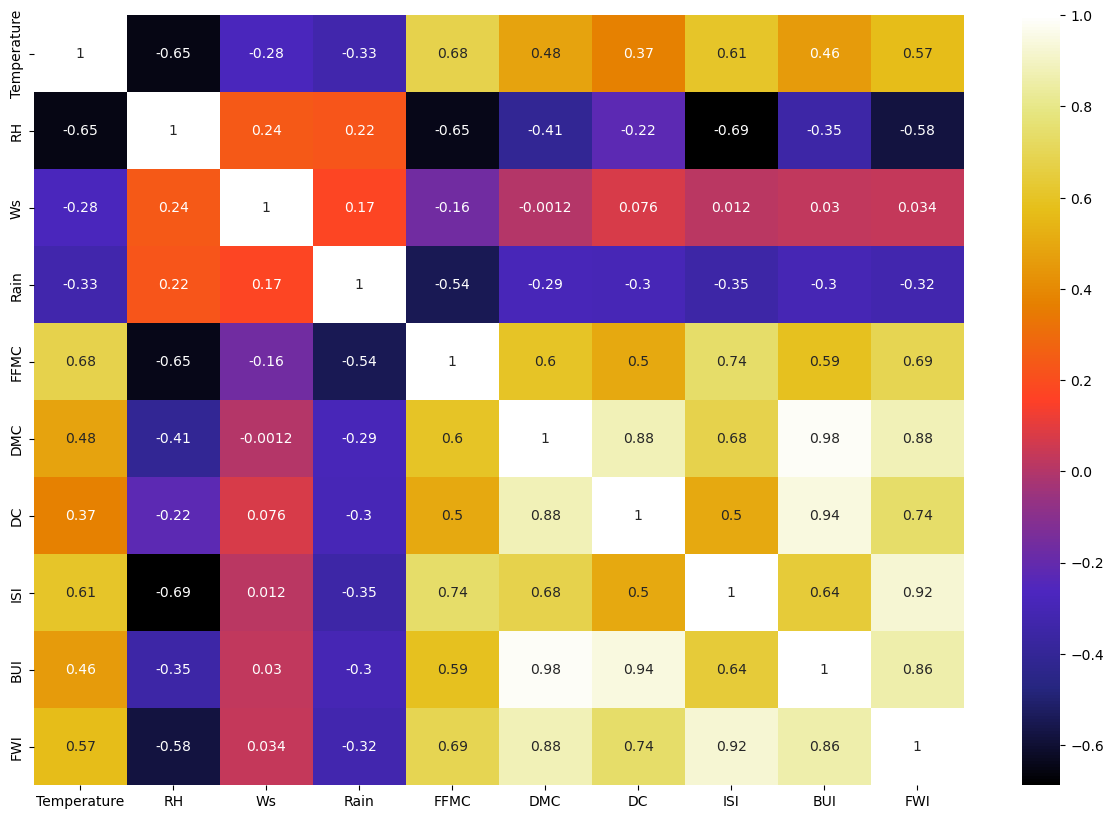

In [50]:
#Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='CMRmap',annot=True)
plt.show()

<AxesSubplot: xlabel='RH', ylabel='Temperature'>

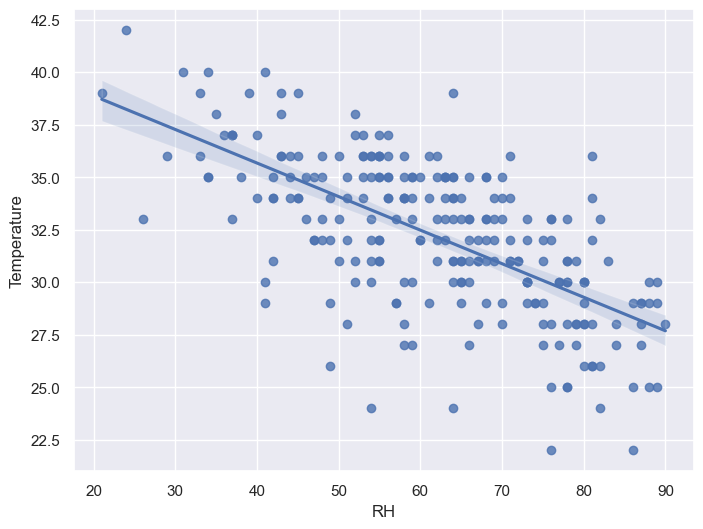

In [51]:
#Creating a regression plot
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x='RH',y='Temperature',data=data)

In [53]:
#Independent and dependent features
x = data_new.iloc[:,1:-3]
y = data_new.iloc[:,0]

In [54]:
x

RH    Ws  Rain  FFMC    DC  ISI   BUI  FWI
0    57  18.0   0.0  65.7   7.6  1.3   3.4  0.5
1    61  13.0   1.3  64.4   7.6  1.0   3.9  0.4
2    82  22.0  13.1  47.1   7.1  0.3   2.7  0.1
3    89  13.0   2.5  28.6   6.9  0.0   1.7  0.0
4    77  16.0   0.0  64.8  14.2  1.2   3.9  0.5
..   ..   ...   ...   ...   ...  ...   ...  ...
240  65  14.0   0.0  85.4  44.5  4.5  16.9  6.5
241  87  15.0   4.4  41.1   8.0  0.1   6.2  0.0
242  87  29.0   0.5  45.9   7.9  0.4   3.4  0.2
243  54  18.0   0.1  79.7  15.2  1.7   5.1  0.7
244  64  15.0   0.2  67.3  16.5  1.2   4.8  0.5

[244 rows x 8 columns]

In [55]:
y

0      29
1      29
2      26
3      25
4      27
       ..
240    30
241    28
242    27
243    24
244    24
Name: Temperature, Length: 244, dtype: int32

In [56]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [57]:
x_train

RH    Ws  Rain  FFMC     DC  ISI   BUI   FWI
238  49   6.0   2.0  61.3   28.1  0.6  11.9   0.4
78   54  18.0   0.0  89.4  110.9  9.7  27.5  16.1
25   64  18.0   0.0  86.8   71.8  6.7  21.6  10.6
125  80  14.0   2.0  48.7    7.6  0.3   2.6   0.1
177  64   9.0   1.2  73.8   15.9  1.1  11.4   0.7
..   ..   ...   ...   ...    ...  ...   ...   ...
64   69  13.0   0.0  85.0   19.8  4.0   8.2   3.9
15   89  13.0   0.7  36.1    7.6  0.0   2.2   0.0
229  51  13.0   0.0  88.7   50.2  6.9  17.8   9.8
126  64  14.0   0.0  79.4   15.4  2.2   5.6   1.0
9    79  12.0   0.0  73.2   46.3  1.3  12.6   0.9

[163 rows x 8 columns]

In [58]:
x_test

RH    Ws  Rain  FFMC     DC   ISI   BUI   FWI
163  56  15.0   2.9  74.8    9.5   1.6   6.8   0.8
60   64  17.0   0.0  87.2  145.7   6.8  41.2  15.7
61   45  14.0   0.0  78.8   10.2   2.0   4.7   0.9
63   63  14.0   0.3  76.6   10.0   1.7   5.5   0.8
69   59  17.0   0.0  87.4   57.0   6.9  17.9   9.9
..   ..   ...   ...   ...    ...   ...   ...   ...
170  68  15.0   0.0  86.1   51.6   5.2  23.9   9.1
233  41   8.0   0.1  83.9   86.0   2.7  28.9   5.6
145  59  16.0   0.8  74.2    8.3   1.6   6.7   0.8
209  37  16.0   0.0  92.2  167.2  13.1  64.0  30.3
105  76  26.0   8.3  47.4    7.0   0.4   1.6   0.1

[81 rows x 8 columns]

In [59]:
y_train

238    26
78     36
25     31
125    29
177    39
       ..
64     34
15     29
229    32
126    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [60]:
y_test

163    34
60     35
61     36
63     35
69     35
       ..
170    33
233    29
145    33
209    33
105    22
Name: Temperature, Length: 81, dtype: int32

In [61]:
x_train.shape

(163, 8)

In [62]:
x_test.shape

(81, 8)

In [63]:
y_train.shape

(163,)

In [64]:
y_test.shape

(81,)

### Standardization and feature scaling of the dataset

* The reason for using **fit_transform()** on **training data** and **transform()** on **test data** is to ensure that the scaling is performed in a way that is consistent with the training data.


* **fit_transform()** is used to fit the scaler to the training data and apply the scaling. 


* This way the scaler can learn the appropriate mean and standard deviation of the data and transform the training data accordingly.


* When we use **transform()** on the test data, the same scaling that was learned from the training data is applied to the test data, making sure that the test data is transformed in a way that is consistent with the training data. 


* This is important because the model is trained on the training data, and the test data should be in the same scale as the training data in order to evaluate the model's performance accurately.


* In summary, the use of **fit_transform()** on the **training data** and **transform()** on the **test data** helps to prevent data leakage and ensures that the scaling is consistent between the training and test data.

In [65]:
scaler = StandardScaler()
scaler

StandardScaler()

In [66]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.97156746,
        -0.32636097, -0.86597829],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.19293541,
         0.76499972,  1.21371864],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.47936304,
         0.35224151,  0.48516239],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.52693453,
         0.08639724,  0.37919057],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.59099552,
        -0.76710278, -0.78649943],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.80506723,
        -0.27738965, -0.7997459 ]])

In [67]:
x_test = scaler.transform(x_test)
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -8.21325921e-01, -7.33709998e-01,
        -6.83151962e-01, -8.12992382e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  2.03374779e+00,  5.03148781e-01,
         1.72343828e+00,  1.16073273e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -8.06652268e-01, -6.38567015e-01,
        -8.30065901e-01, -7.99745905e-01],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -8.10844740e-01, -7.09924252e-01,
        -7.74098686e-01, -8.12992382e-01],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.74386276e-01,  5.26934527e-01,
         9.33931438e-02,  3.92437047e-01],
       [-5.91330147e-01,  2.72169591e-01, -4.41414004e-01,
         8.21667676e-01,  2.36495311e+00,  1.35943563e+00,
         2.16418009e+00,  2.03500022e+00],
       [-5.91330147e-01,  1.363078

## Linear Regression

In [68]:
#Creating the model
regression = LinearRegression()
regression

LinearRegression()

In [69]:
#Fitting the model
regression.fit(x_train,y_train)

LinearRegression()

In [70]:
#Getting the regression coefficients
print(regression.coef_)

[-1.26727905 -0.54101797 -0.21943186  1.05414753  0.53223083  0.02362972
 -0.25283375  0.23646389]


In [71]:
#Getting the regression interecept
print(regression.intercept_)

32.17791411042945


In [72]:
#Making predictions
reg_pred = regression.predict(x_test)
reg_pred

array([31.73234662, 33.39030119, 33.61405111, 31.87954716, 33.06586657,
       34.96791538, 33.85027588, 33.63331414, 32.04804585, 33.05943254,
       33.62988831, 27.82290771, 35.29347506, 29.44088401, 31.91096644,
       31.87132156, 33.9602693 , 28.18105257, 36.08101602, 34.34075554,
       32.79958404, 33.97078827, 33.7809388 , 32.80308456, 35.80069454,
       28.76933598, 32.31539014, 33.19651414, 27.726304  , 32.1854697 ,
       26.1619812 , 26.83083981, 34.07093816, 32.02044265, 33.00423786,
       30.61595053, 29.01549448, 32.44992806, 27.79955503, 35.53550024,
       32.73243283, 34.01374459, 33.88861804, 31.13859887, 36.41778054,
       34.19675343, 24.84645618, 34.98096926, 33.78536207, 29.7113244 ,
       31.21947136, 32.53177937, 35.69163645, 32.19023599, 30.33258848,
       30.33765202, 32.56225677, 36.14611876, 31.18504901, 33.45719224,
       32.38282845, 32.76026682, 31.20488789, 24.7061469 , 31.70034426,
       36.06315152, 29.54046257, 29.98448783, 34.87238095, 33.47

### Assumptions of Linear Regression

1. Linearity: The relationship between the independent and dependent variables should be linear.


2. Independence: The observations should be independent of each other.


3. Homoscedasticity: The variance of residuals should be constant for all values of the independent variables.


4. Normality: The residuals should be normally distributed.


5. No multicollinearity: The independent variables should not be highly correlated with each other.


6. No autocorrelation: The residuals should not be correlated with each other.


7. No omitted variable bias: All the relevant independent variables should be included in the model.

In [73]:
#Calculating the residuals
residuals = y_test - reg_pred
residuals

163    2.267653
60     1.609699
61     2.385949
63     3.120453
69     1.934133
         ...   
170    0.590819
233   -7.051674
145    1.464636
209   -3.543045
105   -3.163825
Name: Temperature, Length: 81, dtype: float64

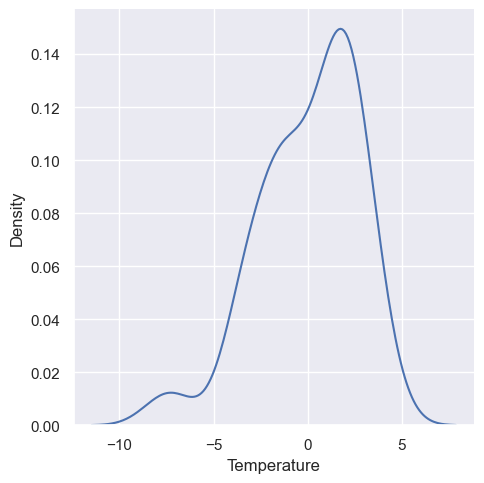

In [75]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind='kde')

* Distribution is left skewed.

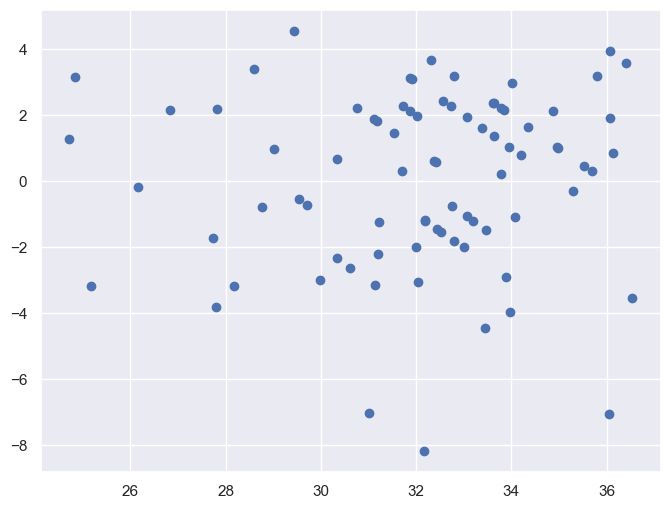

In [76]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(reg_pred,residuals)

In [77]:
print(mean_squared_error(y_test,reg_pred))

6.945272606141771


In [78]:
print(mean_absolute_error(y_test,reg_pred))

2.177260793883495


In [79]:
print(mean_squared_error(y_test,reg_pred,squared=False))

2.635388511423272


In [80]:
#Calcualting the R-Squared
score = r2_score(y_test,reg_pred)
print(score)

0.5407291663922256


In [81]:
#Adjusted R2 value
1 - (1-score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1)

0.48969907376913957

### Ridge regression

* **Ridge Regression** is a type of regularized linear regression algorithm that adds a penalty term equal to the absolute value of each coefficient multiplied by a constant alpha. 


* The purpose of this penalty term is to reduce the magnitude of the coefficients and prevent overfitting, which occurs when the model becomes too complex and fits the noise instead of the underlying relationship. 


* The alpha value controls the strength of the regularization and can be increased to further reduce the coefficients' magnitude. 


* **Ridge Regression** is also known as **L2 Regularization**.

* The main difference between them is the way they handle overfitting.


* **Linear Regression** tries to minimize the sum of squared residuals between the actual and predicted values, while ignoring the presence of multicollinearity (high correlation between independent variables). 


* This can lead to overfitting, where the model becomes too complex and memorizes the training data.


* **Ridge Regression**, on the other hand, adds a penalty term, called L2 regularization, to the sum of squared residuals.


* The regularization term discourages large coefficients, reducing the complexity of the model and preventing overfitting.


* The strength of the regularization is controlled by a hyperparameter, alpha, which determines the balance between the fit of the model to the data and the magnitude of the coefficients.


* So, the main difference between Ridge and Linear Regression is that Ridge Regression tries to overcome overfitting by shrinking the coefficients towards zero, while Linear Regression does not address overfitting.

In [82]:
#Creating the Ridge regression model
ridge = Ridge()
ridge

Ridge()

In [83]:
#Fitting the model
ridge.fit(x_train,y_train)

Ridge()

In [84]:
#Printing the coefficients of the Ridge Regression model
print(ridge.coef_)

[-1.25556305 -0.54050633 -0.22268482  1.03678561  0.48209609  0.07521787
 -0.16554943  0.16717726]


In [85]:
#Printing the intercept of the Ridge Regression model
print(ridge.intercept_)

32.17791411042945


In [86]:
#Making predictions
ridge_pred = ridge.predict(x_test)
ridge_pred

array([31.72605725, 33.37613461, 33.59099929, 31.87475756, 33.05298308,
       34.94776191, 33.81236937, 33.58905972, 32.04356065, 33.05011456,
       33.63429804, 27.82848492, 35.2714216 , 29.42705632, 31.89830943,
       31.88066019, 33.94209218, 28.19471634, 36.09412677, 34.35677201,
       32.78813328, 33.91846485, 33.7668546 , 32.81125404, 35.81850096,
       28.79848967, 32.27720636, 33.18688252, 27.74286139, 32.19181954,
       26.17139638, 26.85538177, 34.05623218, 32.01112485, 32.99003146,
       30.6051685 , 29.01741906, 32.43839626, 27.81381278, 35.49852092,
       32.71106191, 34.02287733, 33.90529872, 31.12955785, 36.40084135,
       34.18287694, 24.85860673, 34.97897127, 33.79331599, 29.71173246,
       31.21495697, 32.52728129, 35.69651118, 32.17999865, 30.34364518,
       30.32374592, 32.60145273, 36.15126634, 31.2167123 , 33.45003811,
       32.3710609 , 32.75537003, 31.19849874, 24.70008377, 31.6966219 ,
       36.0677736 , 29.56236916, 29.97858574, 34.88447303, 33.46

### Assumptions of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

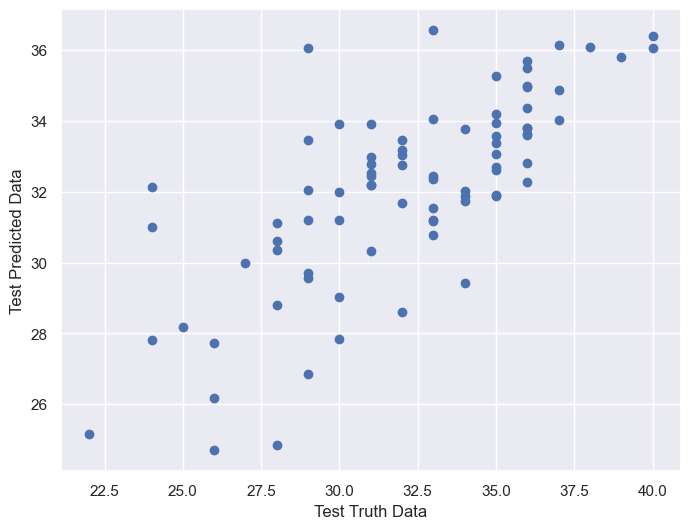

In [87]:
#Relationship between real data and predicted data
plt.scatter(y_test,ridge_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [88]:
#Calculating the residuals
residuals = y_test - ridge_pred
residuals

163    2.273943
60     1.623865
61     2.409001
63     3.125242
69     1.947017
         ...   
170    0.566752
233   -7.051701
145    1.462507
209   -3.561742
105   -3.158492
Name: Temperature, Length: 81, dtype: float64

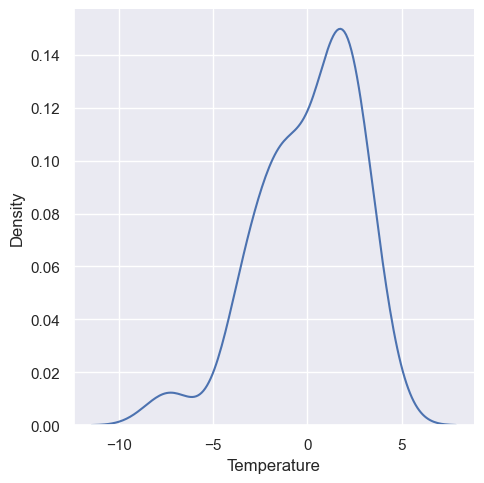

In [90]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind='kde')

* Distribution is left-skewed

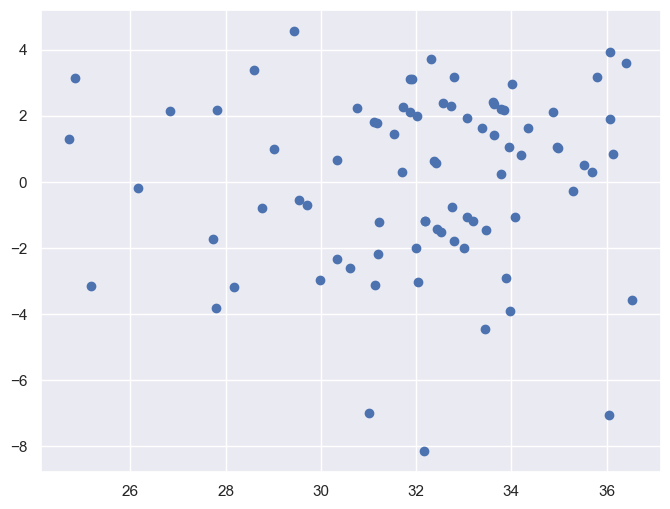

In [91]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(reg_pred,residuals)

In [92]:
print(mean_squared_error(y_test,ridge_pred))

6.937034660929738


In [93]:
print(mean_absolute_error(y_test,ridge_pred))

2.1770147640955564


In [94]:
print(mean_squared_error(y_test,ridge_pred,squared=False))

2.6338251006719746


In [95]:
#Calculating the R2 score
score = r2_score(y_test,ridge_pred)
print(score)

0.5412739179346487


In [96]:
#Calculating the adjusted R Squared
1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.49030435326072075

## Lasso Regression

In [97]:
lasso = Lasso()
lasso

Lasso()

In [98]:
lasso.fit(x_train,y_train)

Lasso()

* **Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)** is a type of regularized linear regression technique that adds a penalty term to the loss function to reduce the magnitude of the coefficients. 


* The penalty term is a linear combination of the absolute magnitude of the coefficients, and it's controlled by a hyperparameter alpha. 


* The goal of Lasso Regression is to minimize the loss function, subject to the constraint that the sum of the absolute values of the coefficients is less than a fixed value, which is proportional to alpha. 


* The Lasso Regression can effectively reduce the number of features in a model by shrinking some coefficients to zero, which makes it useful for feature selection.

* Lasso Regression is a type of linear regression that is well suited for cases where some of the independent variables in the model are not needed or have little impact on the target variable. 


* Unlike normal linear regression, lasso regression adds a regularization term to the loss function that penalizes the magnitude of the coefficients, effectively shrinking some of them to zero. 


* This results in a model with fewer variables and a simpler, more interpretable structure.


* The key difference between lasso regression and normal linear regression is the regularization term that is added to the loss function in lasso regression. 


* This term, combined with the constraints on the magnitude of the coefficients, makes lasso regression well-suited for identifying important predictors and reducing the dimensionality of the model.

In [99]:
#Printing the coeficients
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.        ]


In [101]:
#Printing the intercept
print(lasso.intercept_)

32.17791411042945


In [102]:
#Making predictions
lasso_pred = lasso.predict(x_test)
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

### Assumption of Lasso regression

Text(0, 0.5, 'Test Predicted Data')

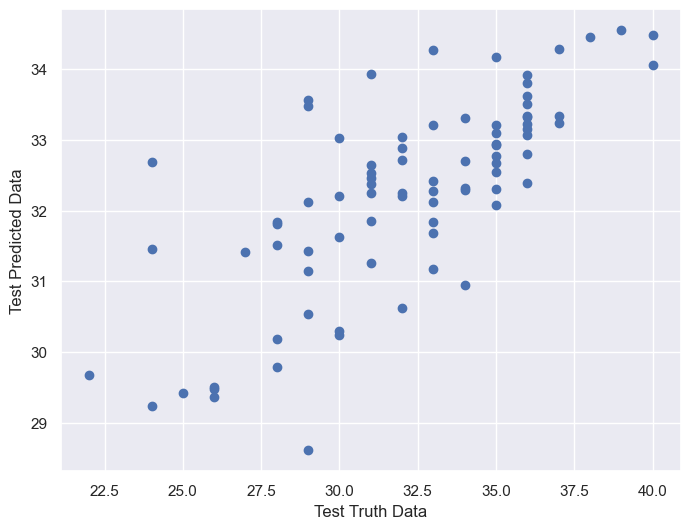

In [103]:
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [104]:
#Calculating residuals
residuals=y_test - lasso_pred
residuals

163    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
170    0.583574
233   -4.568827
145    0.882714
209   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

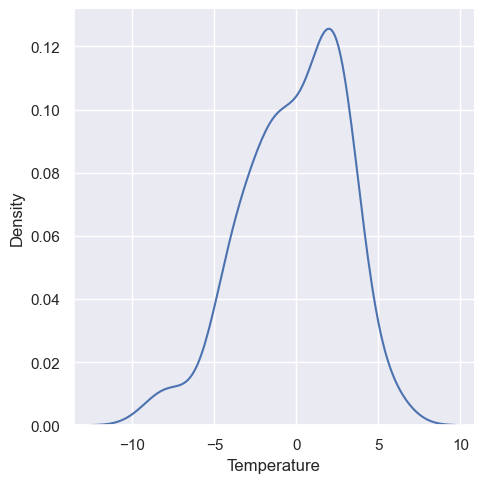

In [105]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

* Distribution is left skewed.

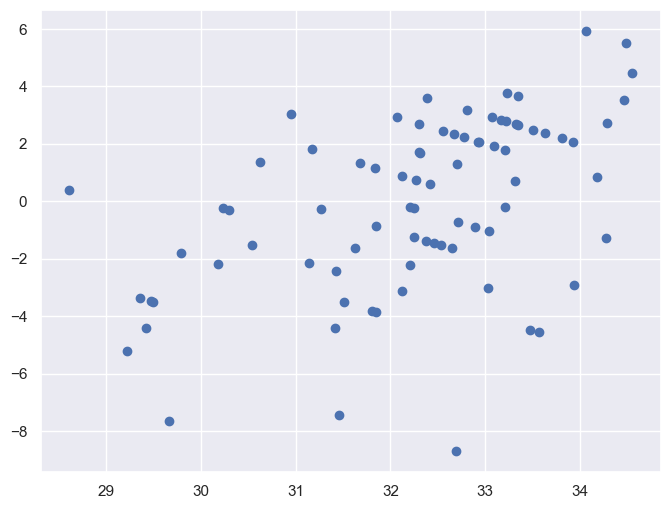

In [106]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(lasso_pred,residuals)

In [107]:
print(mean_squared_error(y_test,lasso_pred))

9.10609532182792


In [108]:
print(mean_absolute_error(y_test,lasso_pred))

2.4978660766652734


In [109]:
print(mean_squared_error(y_test,lasso_pred,squared=False))

3.0176307464346794


In [110]:
# Calculating the R2 value
score=r2_score(y_test,lasso_pred)
print(score)

0.39784019626969913


In [111]:
# Calculating the Adjusted R Squared
1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.33093355141077685

### Elastic Net Regression

* **Elastic Net Regression** is a regularization method that combines both **Lasso Regression** and **Ridge Regression.** 


* It adds a combination of both L1 (Lasso) and L2 (Ridge) penalties to the linear regression loss function. 


* The strength of the penalties can be controlled by a mixing parameter alpha and l1_ratio. By setting alpha=1 and l1_ratio=1, the Elastic Net is equivalent to the Lasso Regression, and when alpha=0 and l1_ratio=0, it is equivalent to the Ridge Regression. 


* Elastic Net is useful when there are both highly correlated variables and irrelevant variables in the dataset.

* Elastic Net Regression is a combination of Ridge Regression and Lasso Regression.


* It balances the advantages of both Ridge Regression (shrinking coefficients towards zero, reducing multicollinearity) and Lasso Regression (automatically performing feature selection, reducing overfitting). 


* The difference with normal linear regression is that it aims to mitigate the drawbacks of both Ridge and Lasso Regression. 


* Normal linear regression makes no assumptions about the distribution of the coefficients, and it can lead to overfitting if the number of features is large compared to the number of samples.

In [112]:
elastic = ElasticNet()
elastic

ElasticNet()

In [113]:
elastic.fit(x_train,y_train)

ElasticNet()

In [114]:
print(elastic.coef_)

[-0.68377791 -0.10873001 -0.02083121  0.70493387  0.          0.22896344
  0.07733533  0.1822098 ]


In [116]:
print(elastic.intercept_)

32.17791411042945


In [117]:
elastic_pred=elastic.predict(x_test)
elastic_pred

array([31.92778274, 32.95250724, 32.71119722, 31.77134083, 32.92801741,
       33.99050179, 33.53902004, 32.58962193, 31.93651966, 32.67134649,
       33.35804182, 29.90659996, 34.18554019, 30.68186444, 32.61165892,
       32.21481692, 32.7945839 , 29.43974043, 35.17418981, 33.89534297,
       32.36213   , 33.43380855, 33.5283983 , 32.8386007 , 35.19633069,
       30.01766464, 32.08455825, 32.54878071, 29.38878202, 32.00984925,
       29.15361138, 28.66254395, 33.22090486, 32.27099015, 32.64751022,
       31.34705984, 30.05651772, 32.28102625, 29.22022742, 34.01465745,
       32.84551243, 33.52330689, 34.21265774, 31.55337147, 34.53418824,
       33.38994892, 29.2787136 , 33.93541974, 33.3964204 , 30.36875762,
       31.40639778, 32.30324864, 34.65294213, 32.00860236, 31.35483638,
       30.93541449, 32.30838596, 34.84461644, 31.58190605, 33.45940298,
       32.0717569 , 32.40440528, 31.24375379, 28.88836001, 31.89035871,
       34.88631868, 30.84584502, 31.00368194, 33.82667918, 32.89

### Assumption of ElasticNet regression

Text(0, 0.5, 'Test Predicted Data')

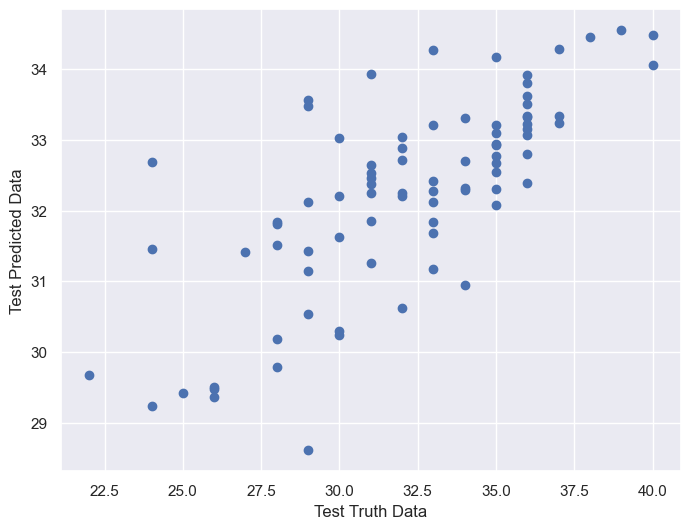

In [118]:
# Relationship between real data and predicted data
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [119]:
# Calculating residual
residuals=y_test - elastic_pred
residuals

163    2.072217
60     2.047493
61     3.288803
63     3.228659
69     2.071983
         ...   
170    0.542605
233   -4.656289
145    1.247988
209   -2.274665
105   -7.082420
Name: Temperature, Length: 81, dtype: float64

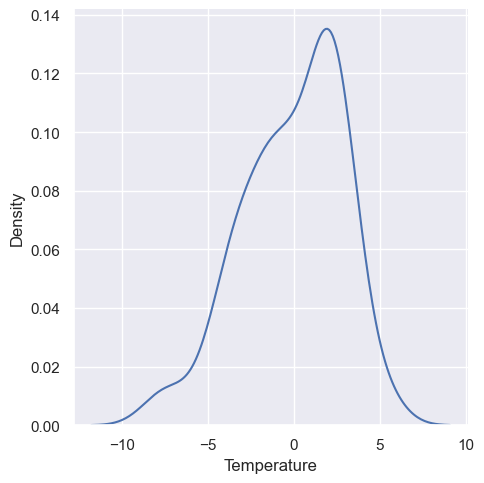

In [120]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

* Distribution is left skewed.

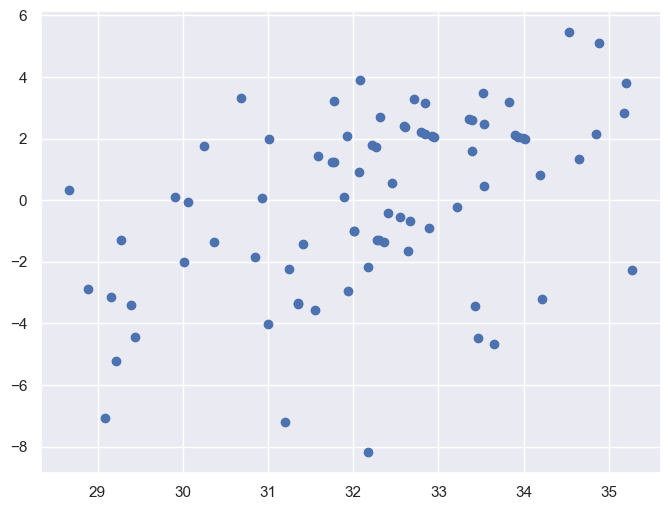

In [121]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(elastic_pred,residuals)

In [122]:
print(mean_squared_error(y_test,elastic_pred))

8.317775387996829


In [124]:
print(mean_absolute_error(y_test,elastic_pred))

2.3928315256929684


In [125]:
print(mean_squared_error(y_test,elastic_pred,squared=False))

2.8840553718673343


In [126]:
# Calculating the R2 value
score = r2_score(y_test,elastic_pred)
print(score)

0.4499695184276321


In [127]:
# Calculating the adjusted R Squared
1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.38885502047514686